#Implement a KNN model to classify the animals in to categorie


In [1]:
from google.colab import files
uploaded = files.upload()


Saving Zoo.csv to Zoo.csv


In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['figure.dpi'] = 250
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import pandas as pd
# Read the Excel file
df = pd.read_csv('Zoo.csv')
# Display the first few rows of the dataset
df.head()


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# EDA

In [4]:
# Summary statistics of the numerical columns
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
df.describe(include=object)

,animal name
count,101
unique,100
top,frog
freq,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
df.shape

(101, 18)

# to remove duplicated values

In [8]:
#finding duplicates
df.duplicated().sum()

0

# To deal with missing values

In [9]:
#finding missing values
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

#Analysing data

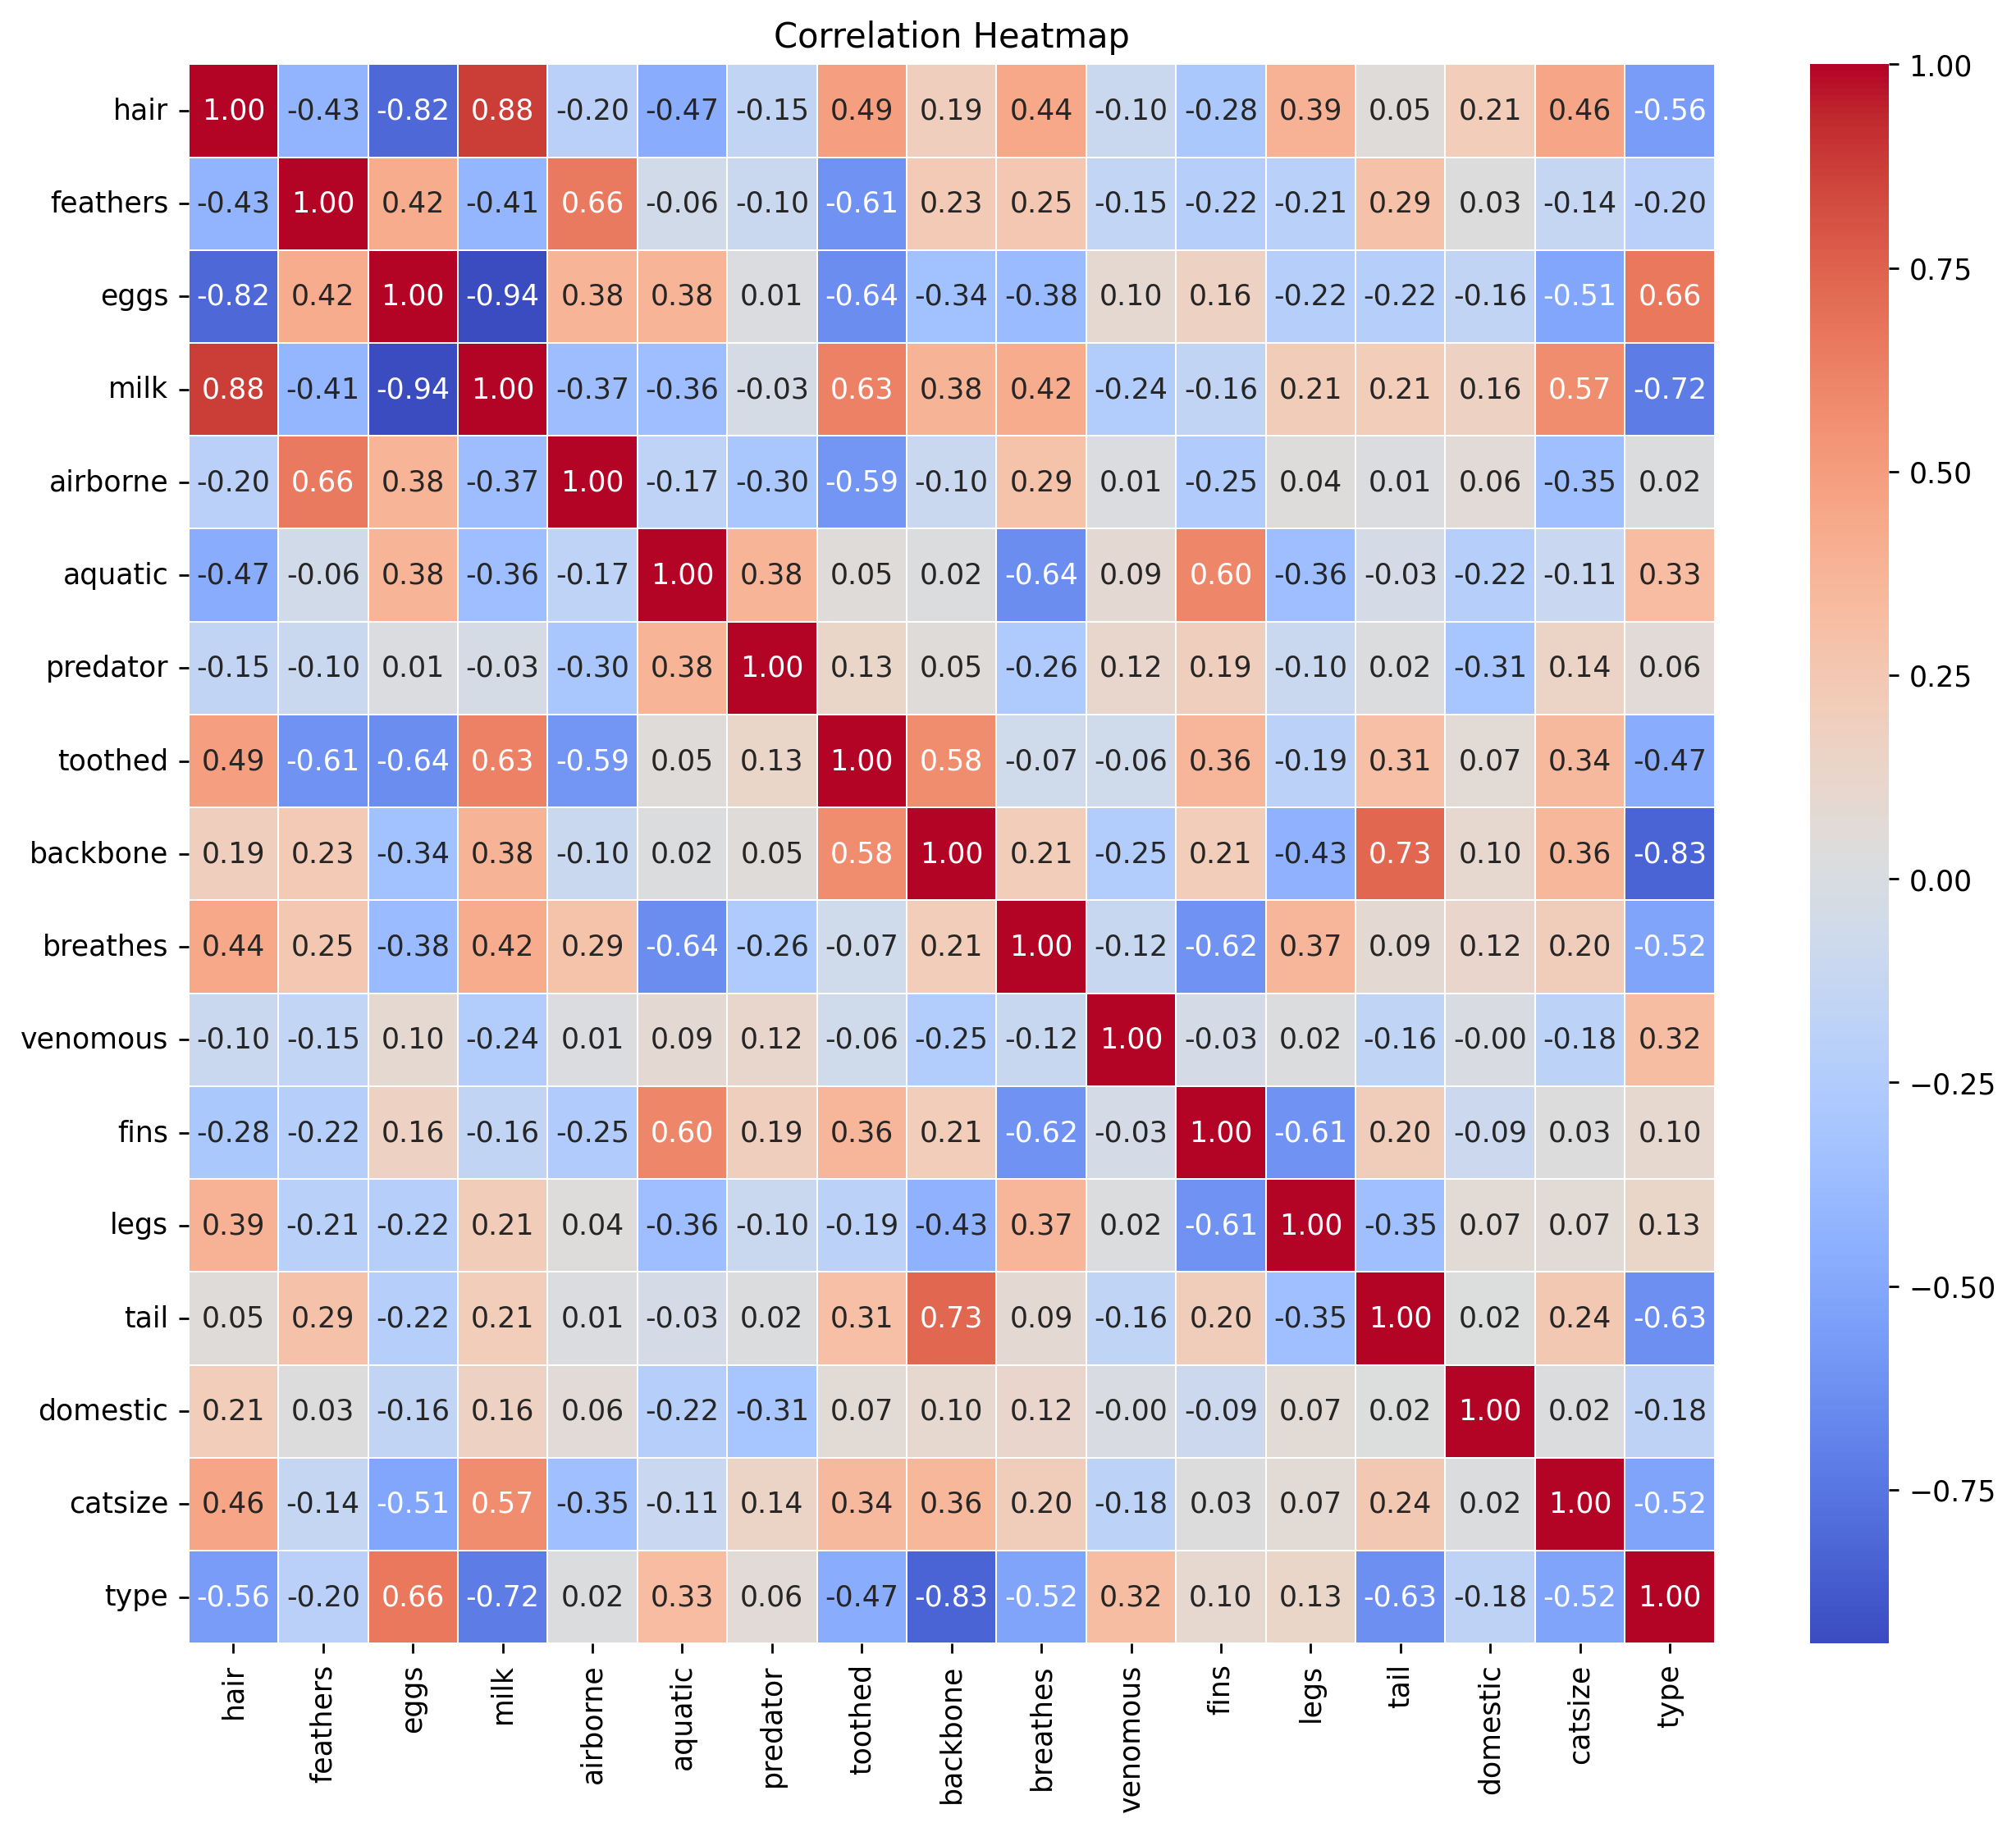

In [10]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include="number").corr()

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(12, 10))

# Create a heatmap with a diverging color map and annotated values
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add a title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()


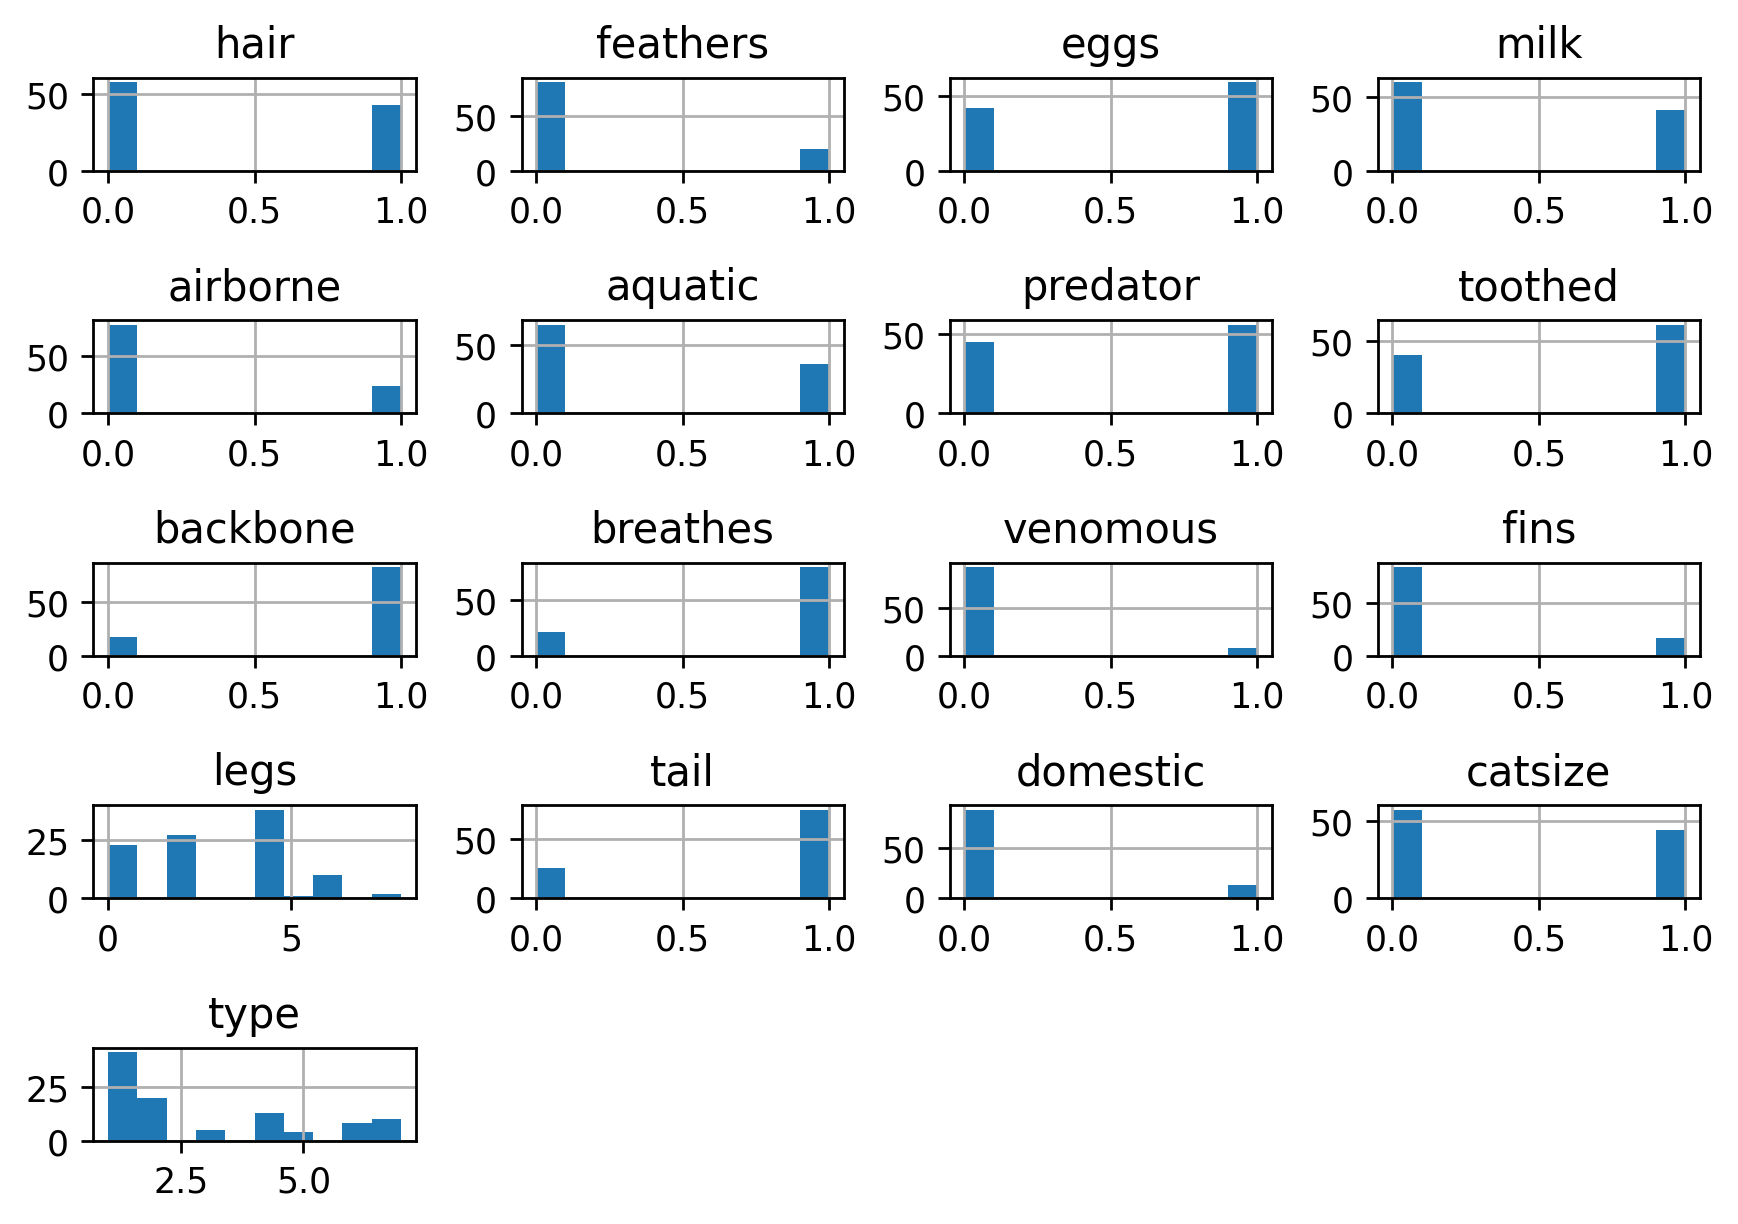

In [11]:
df.hist()
plt.tight_layout()

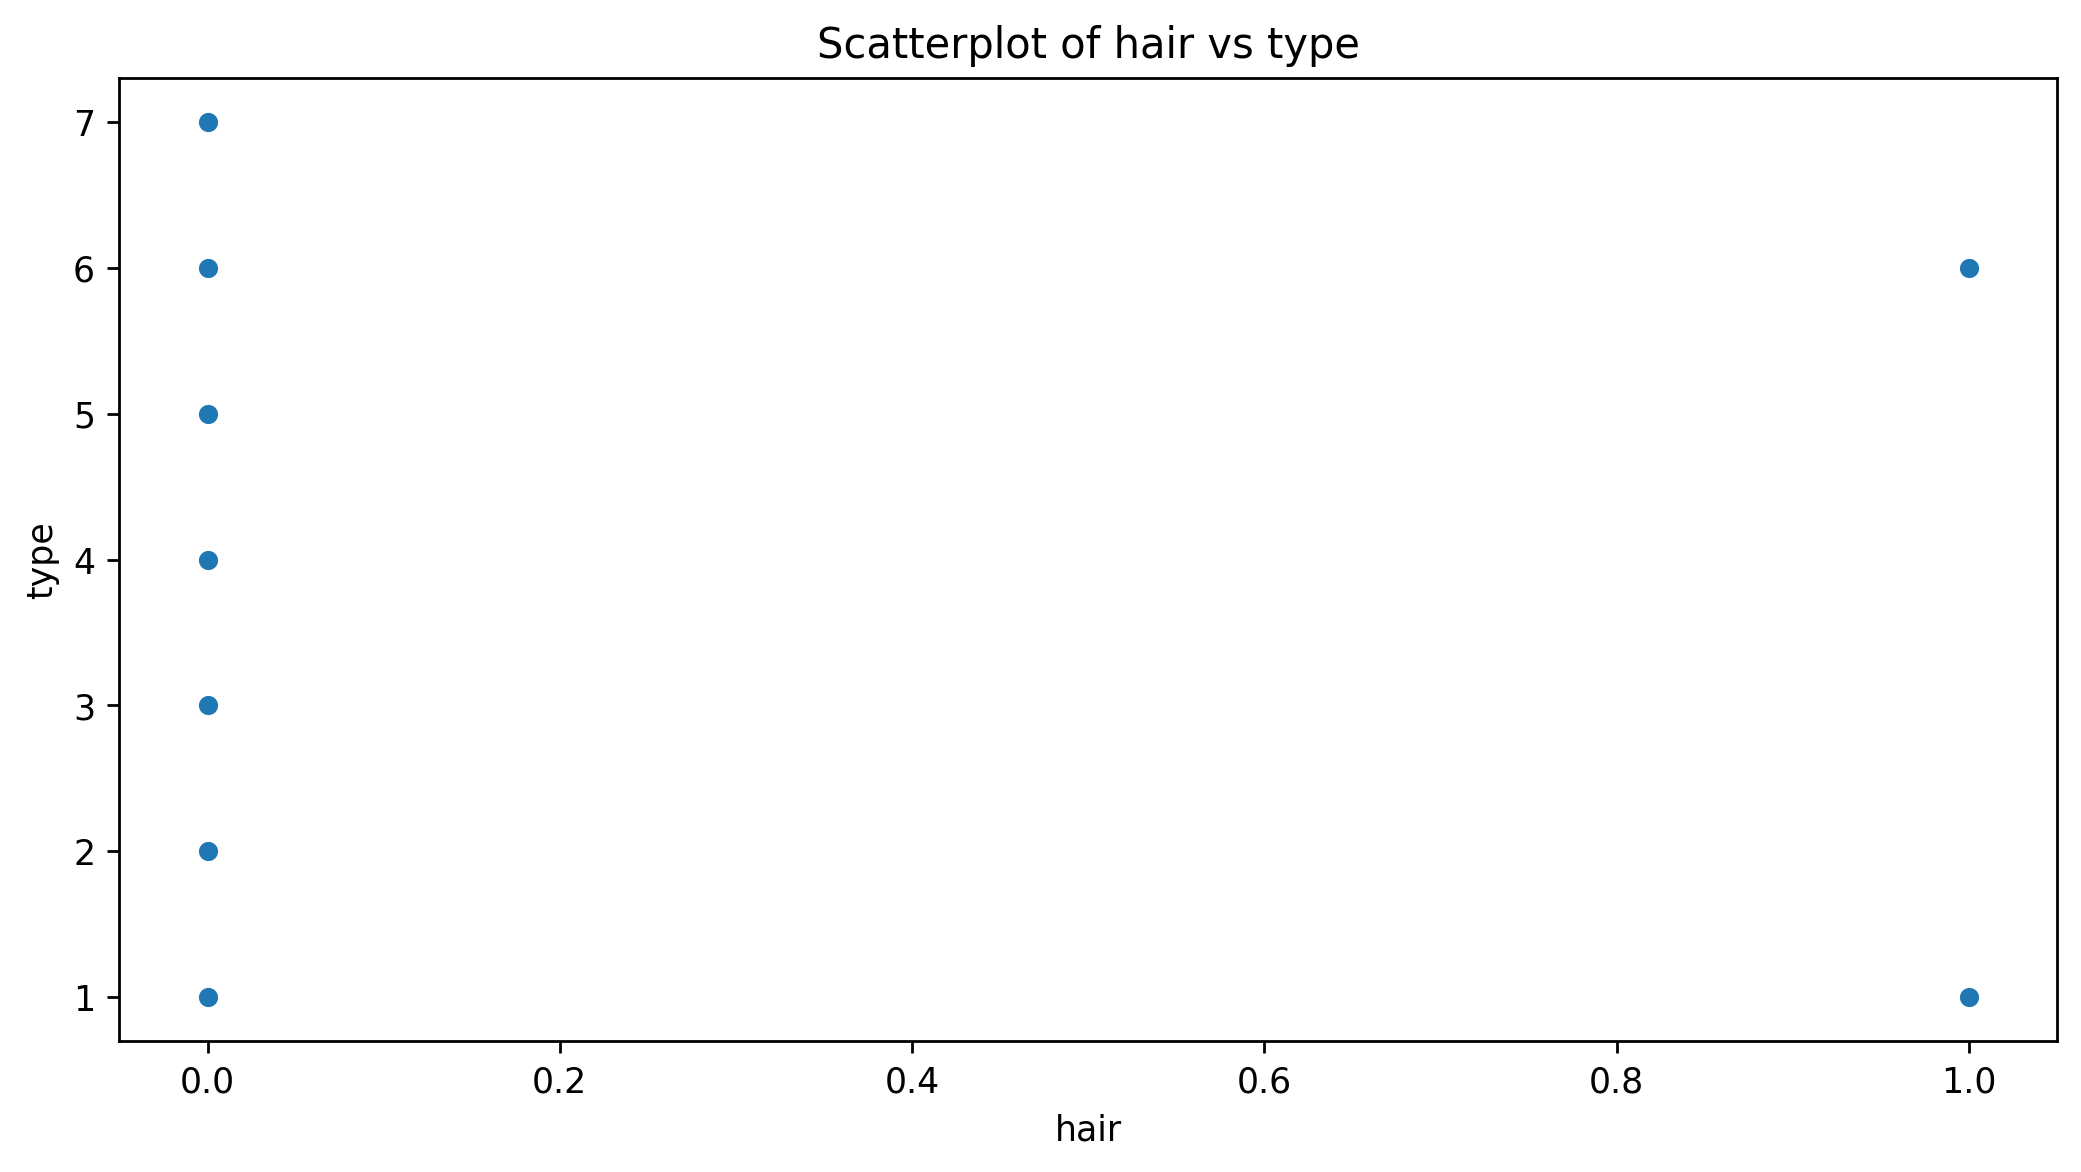

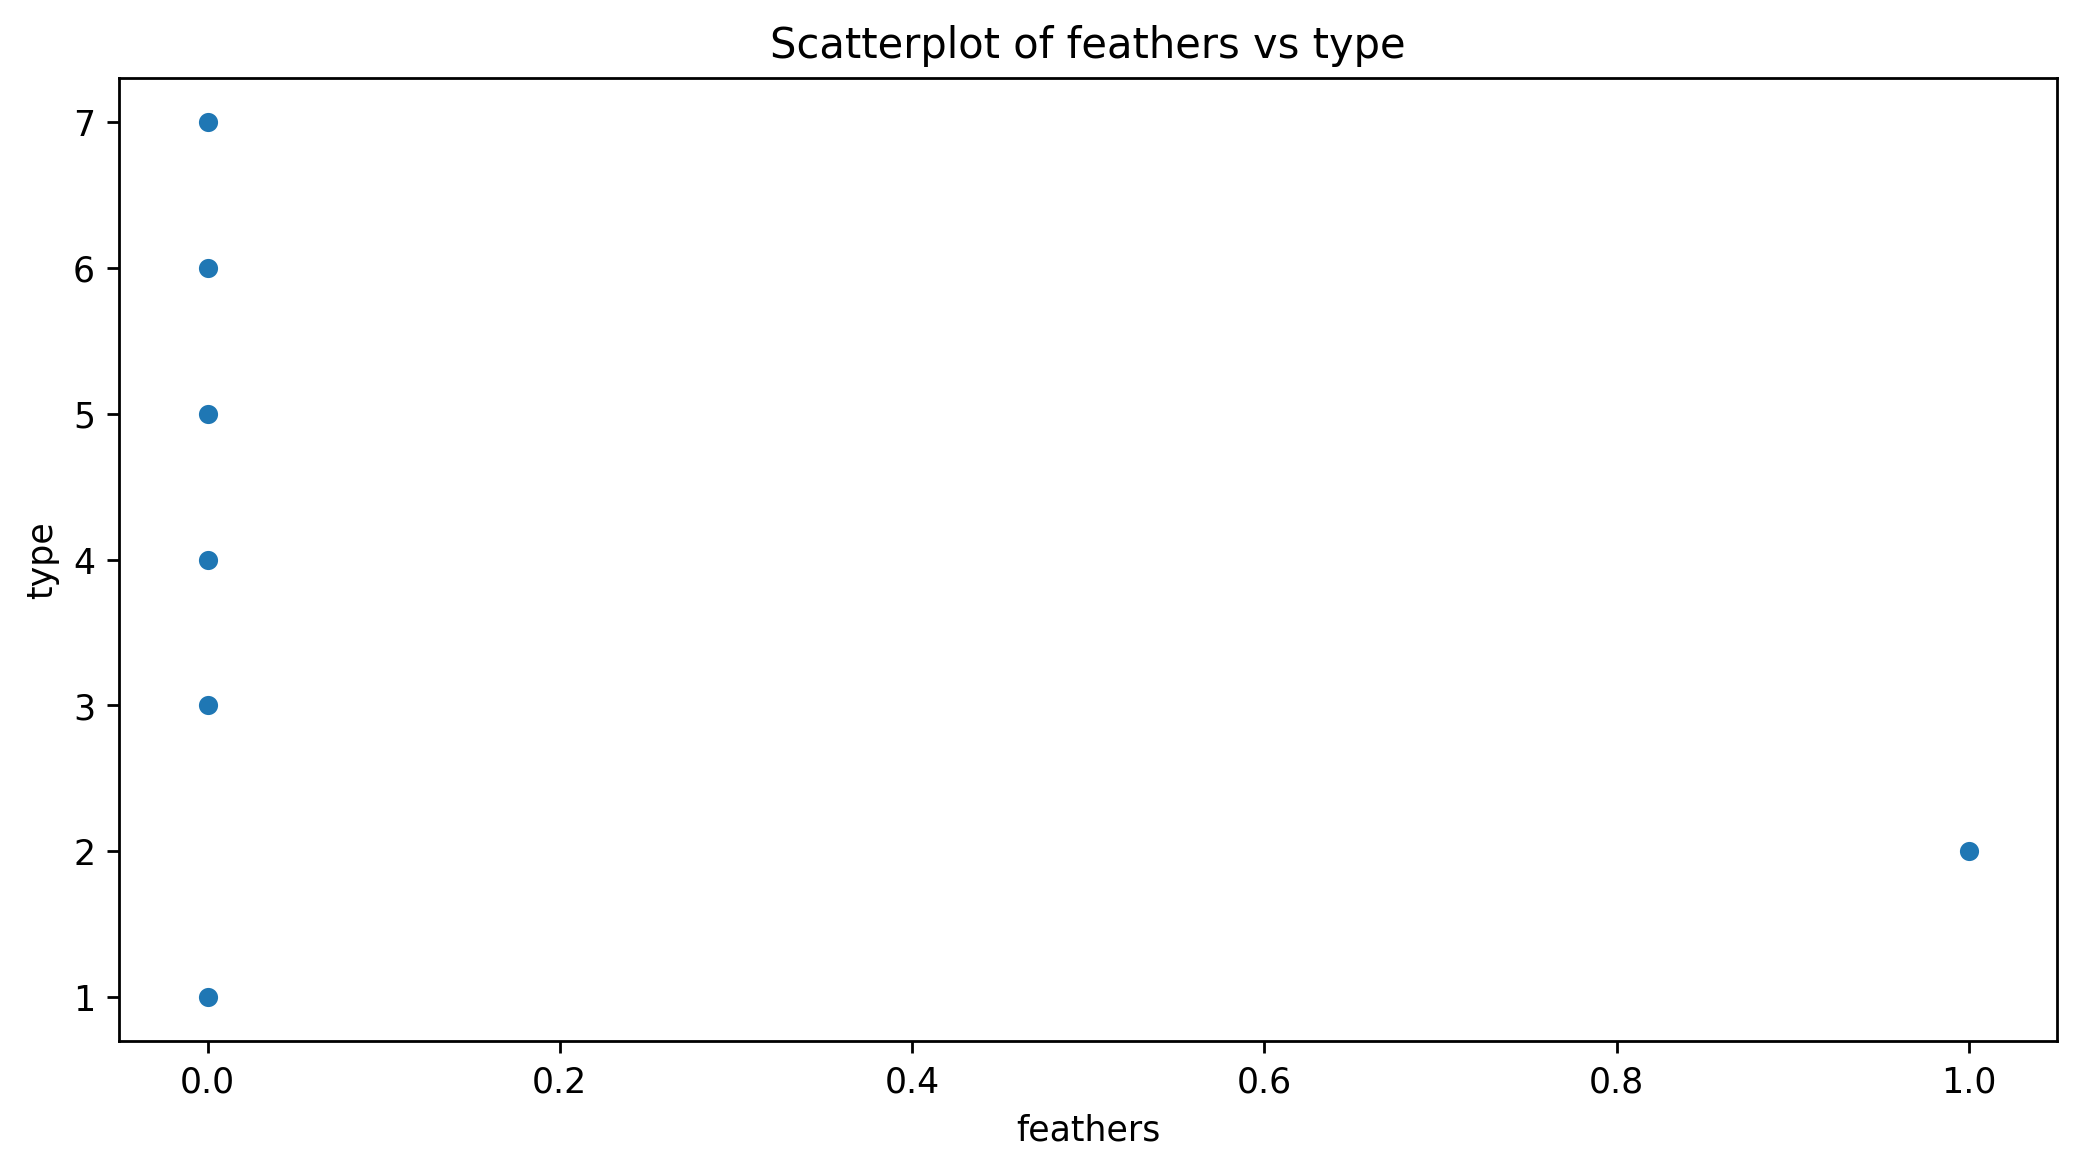

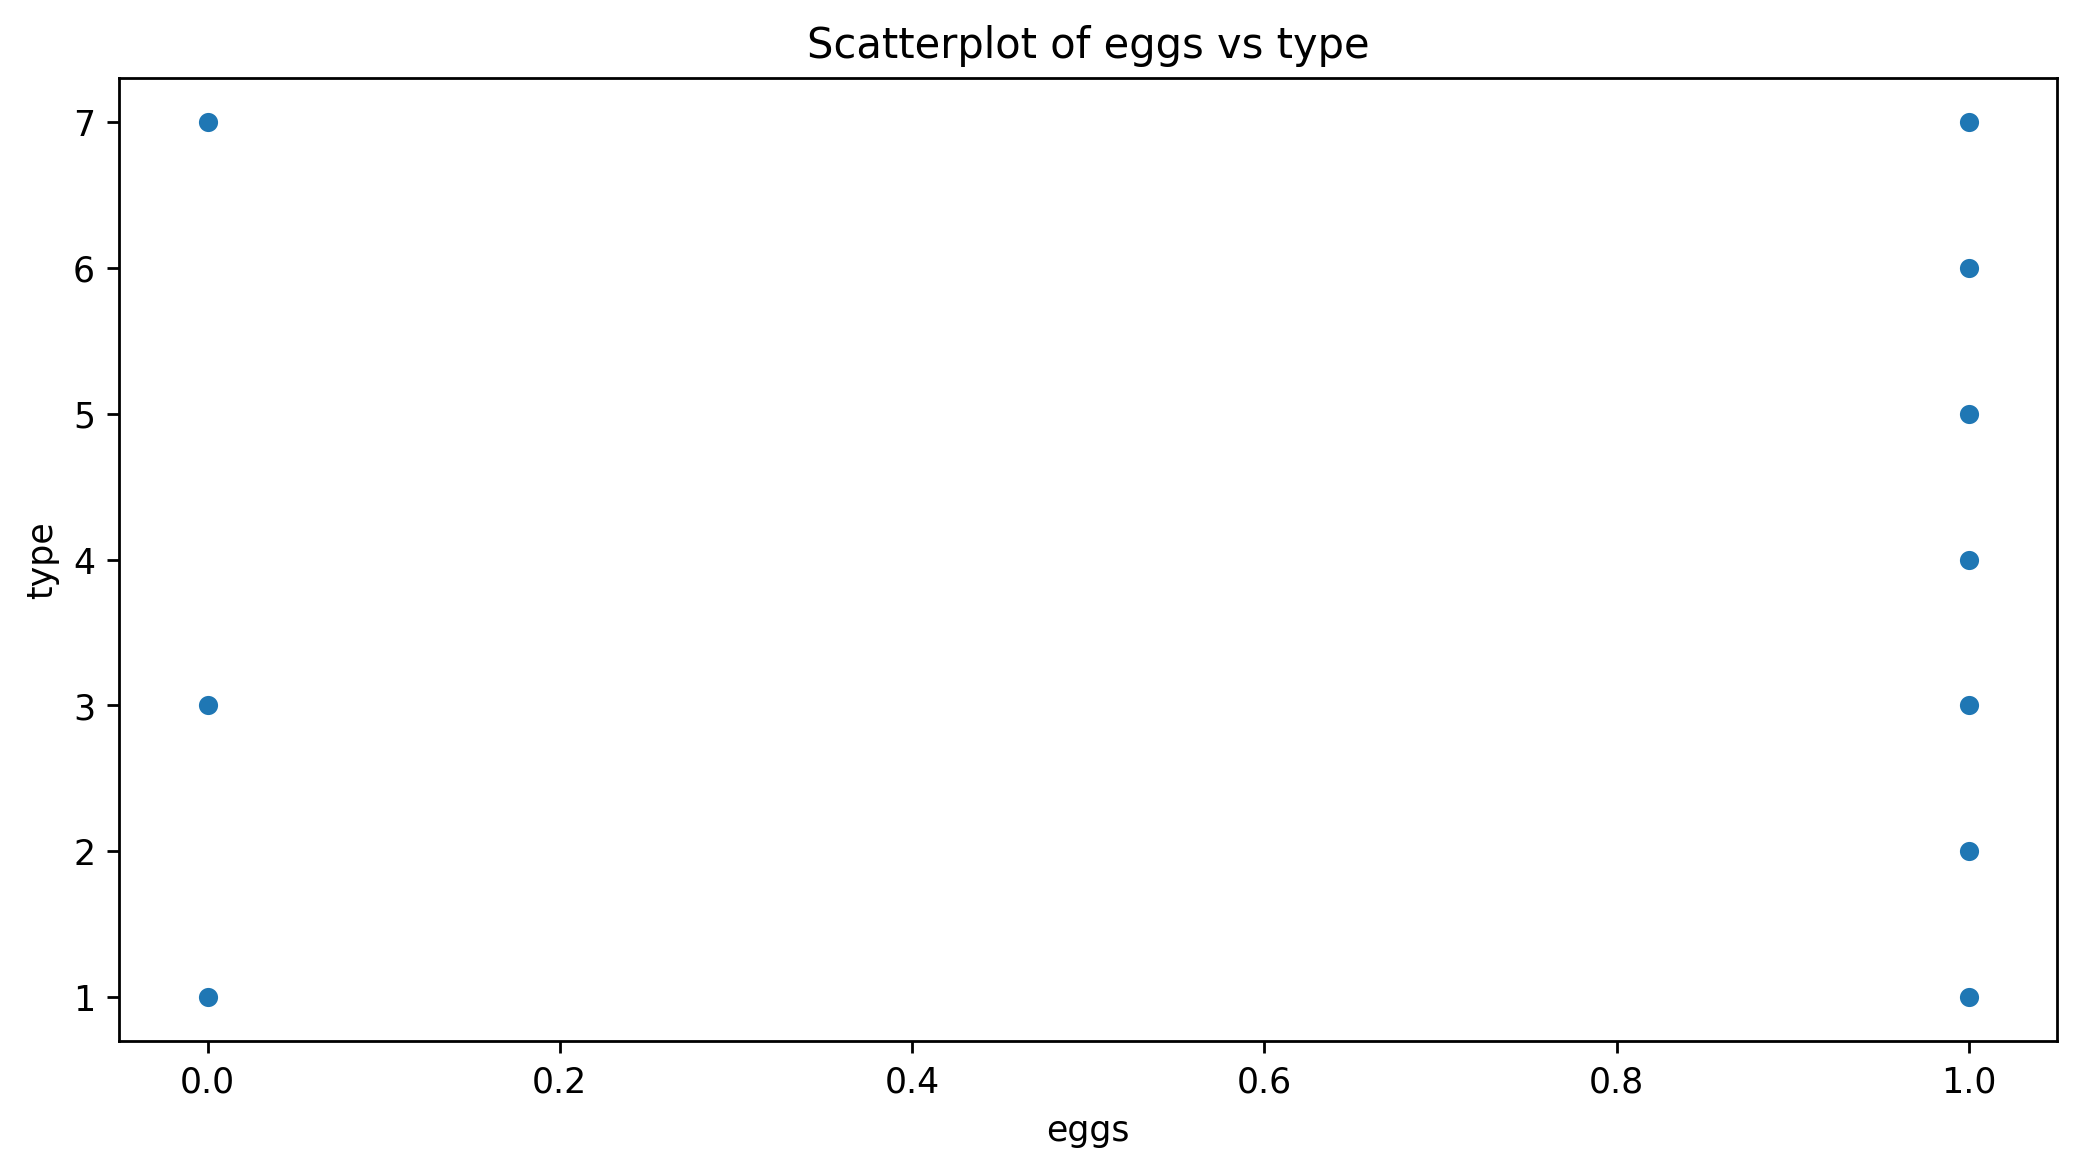

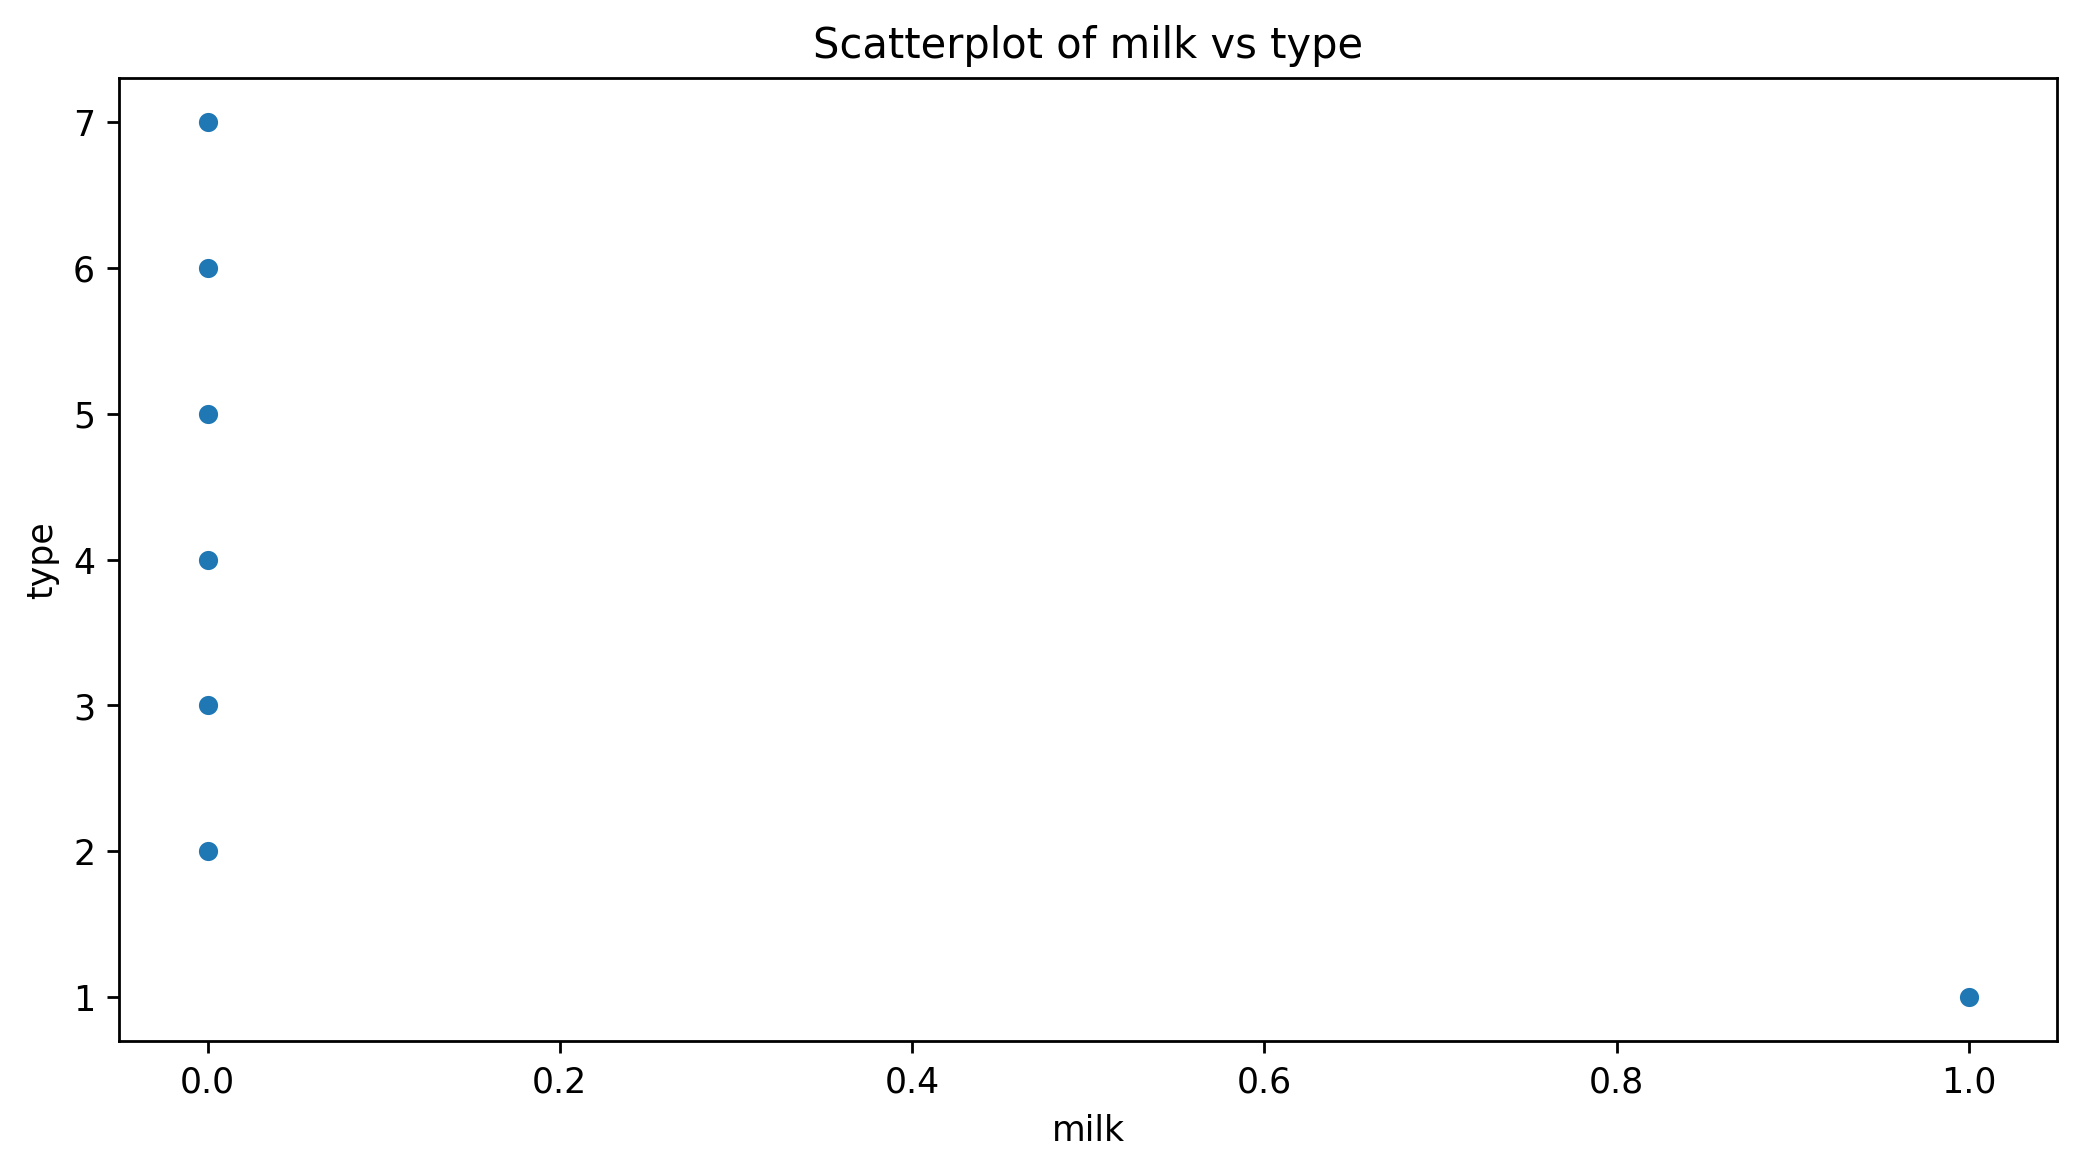

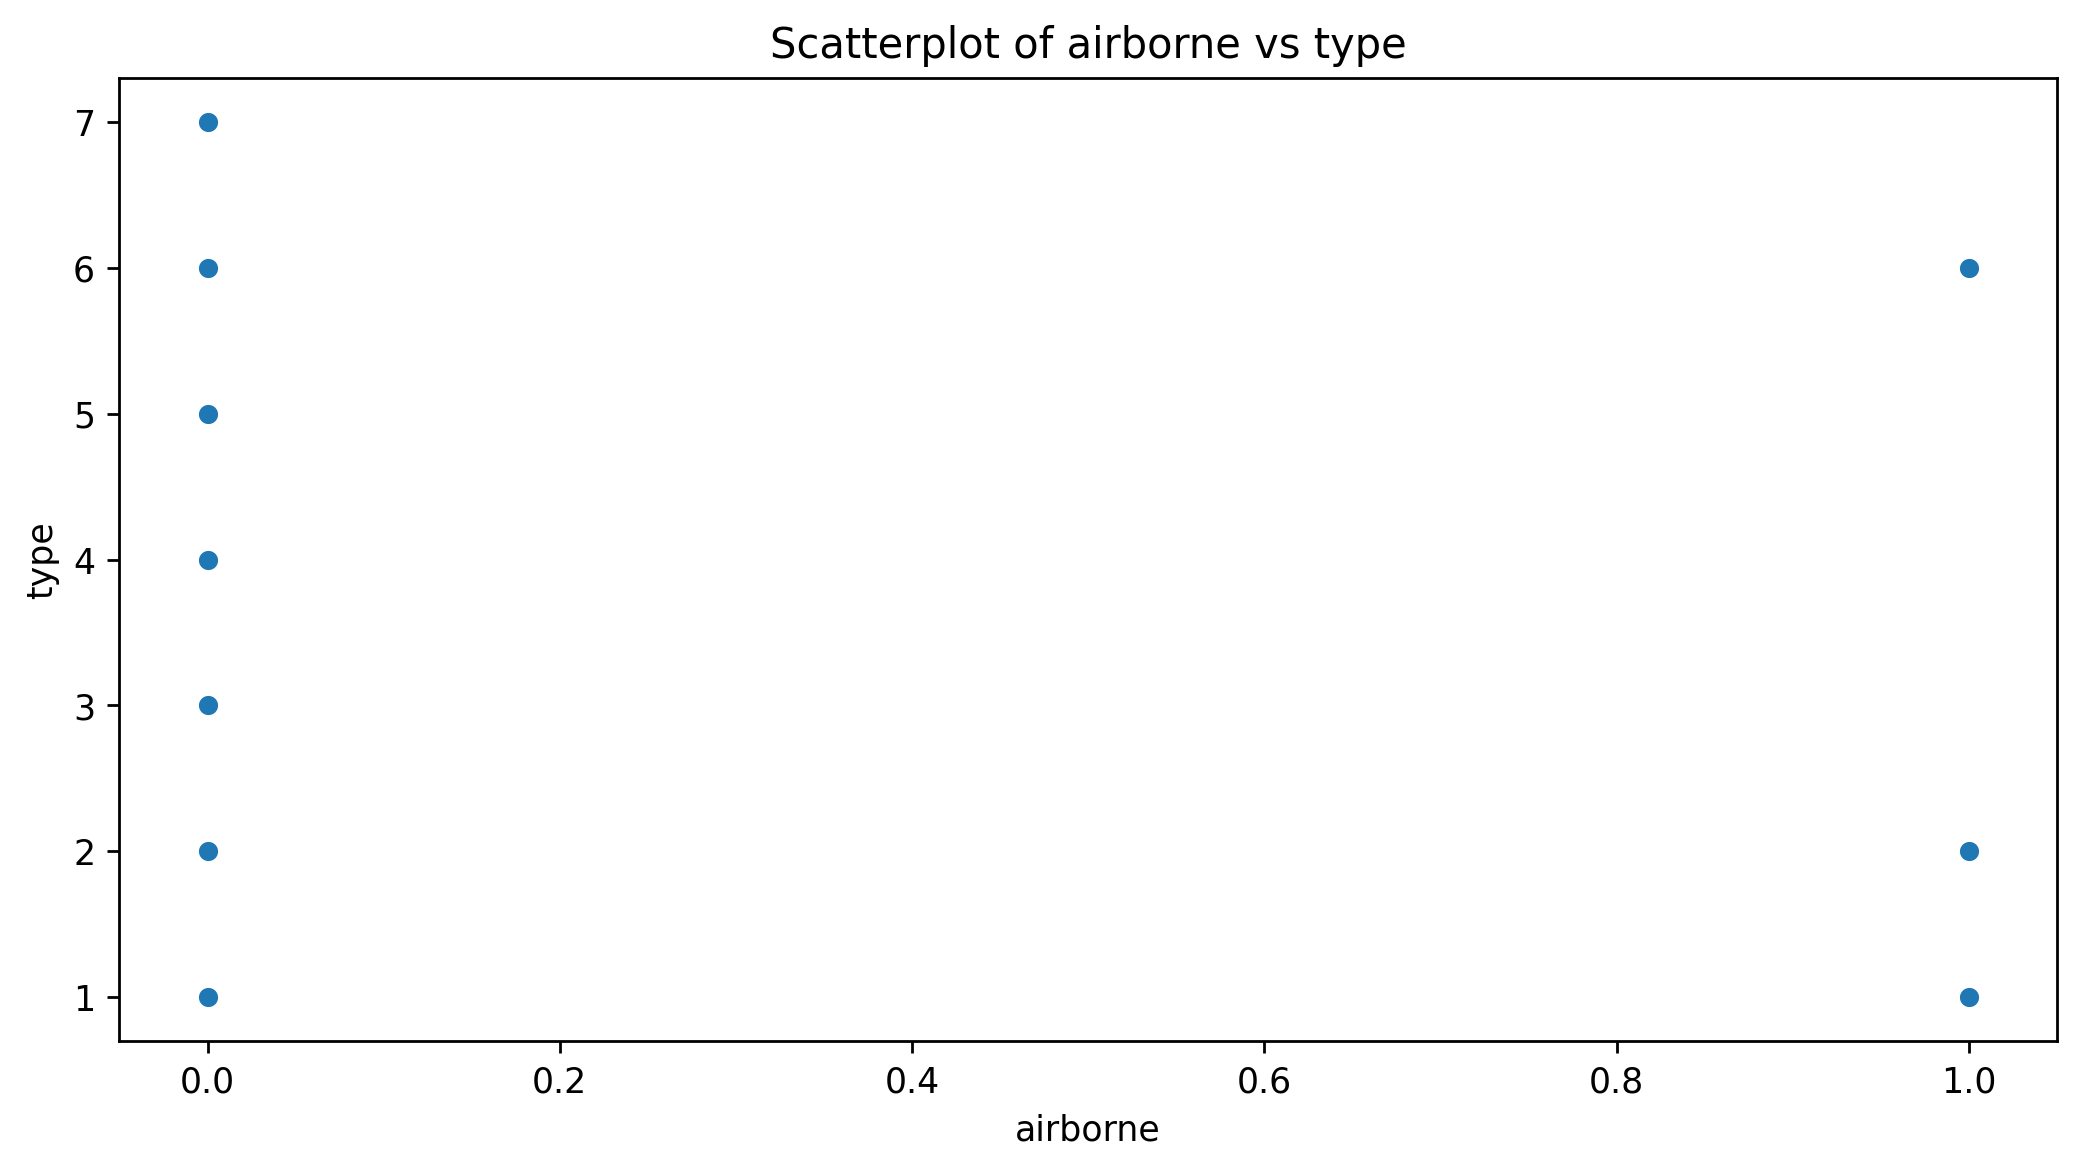

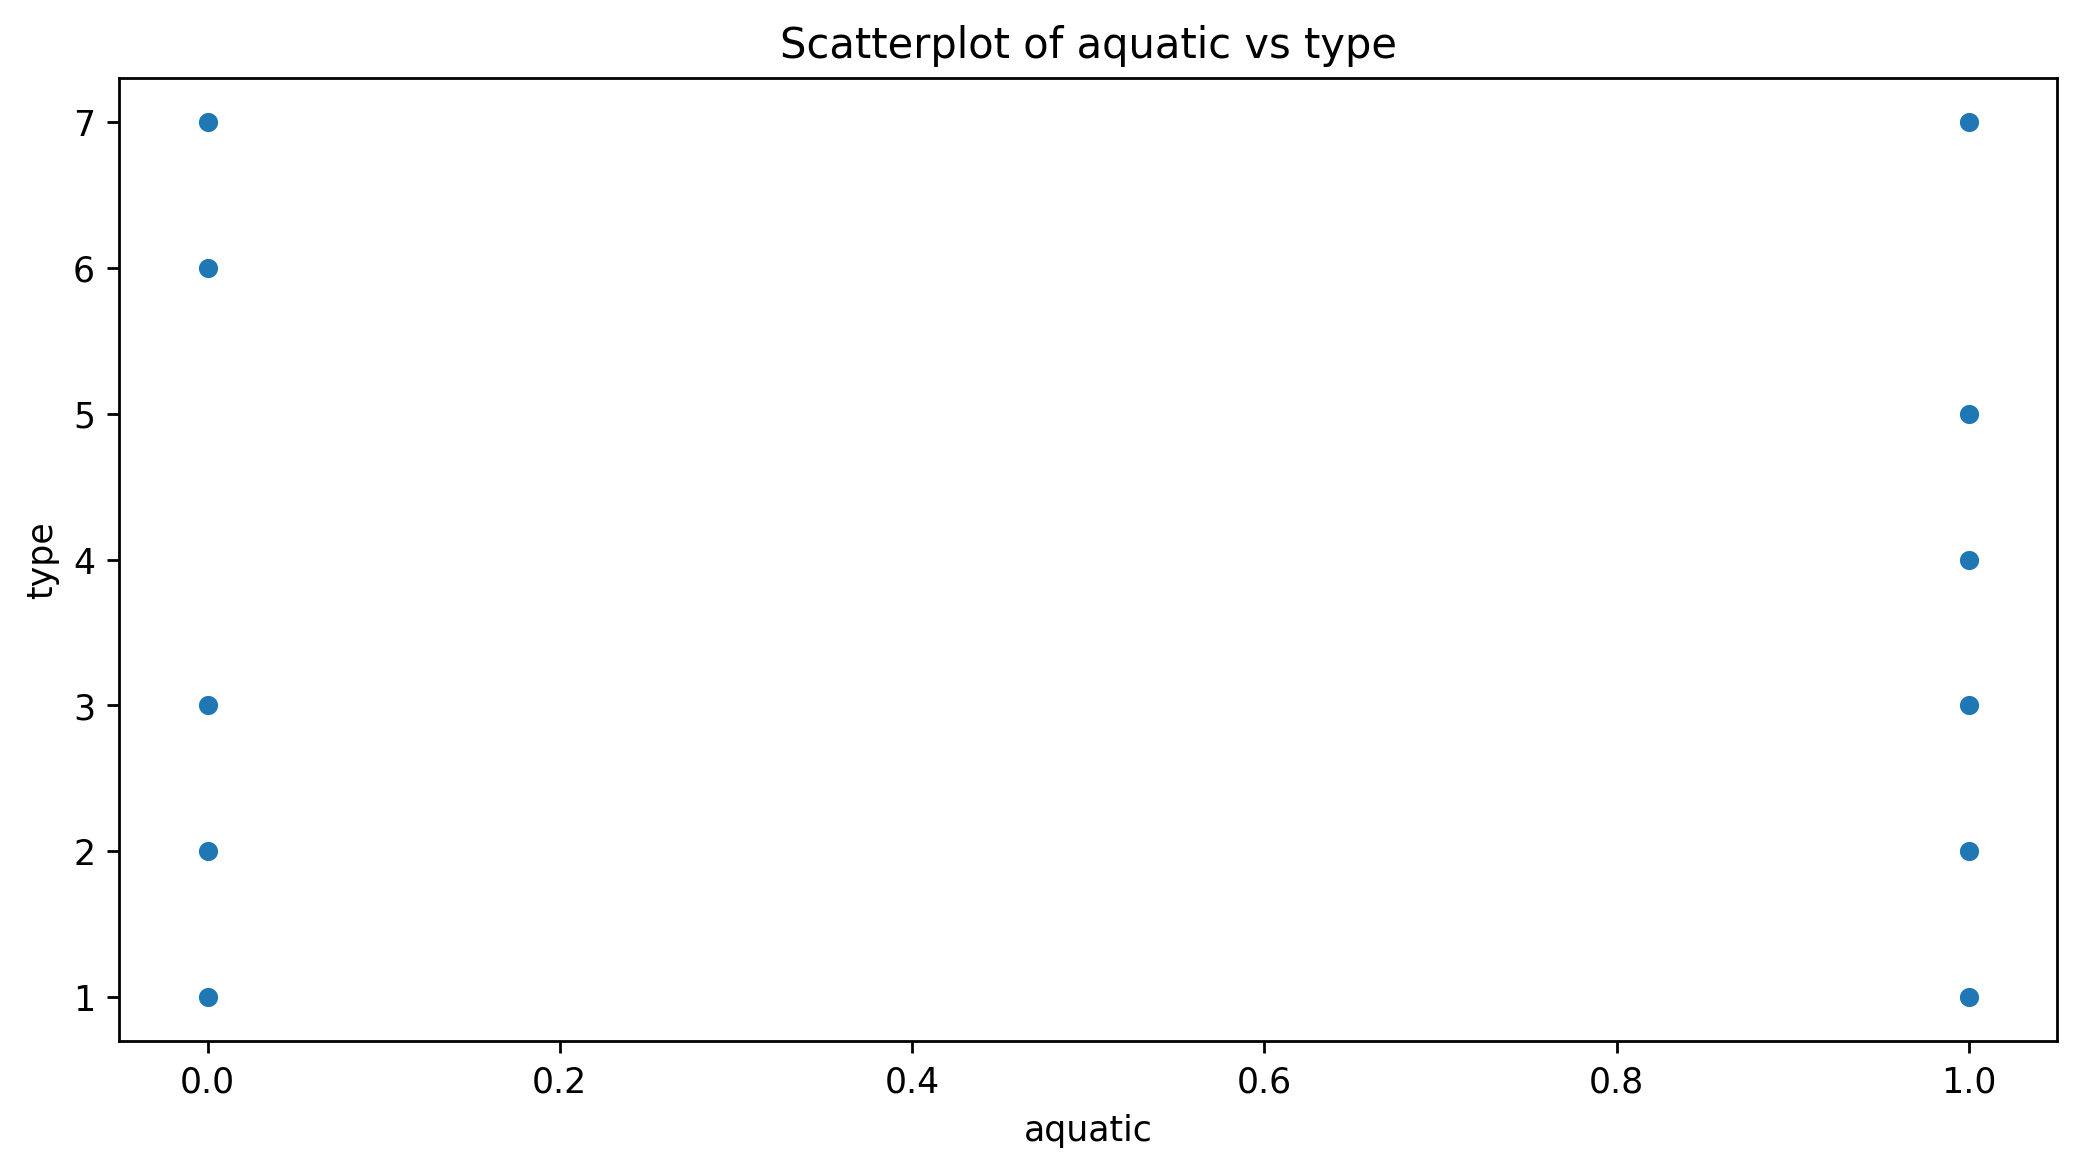

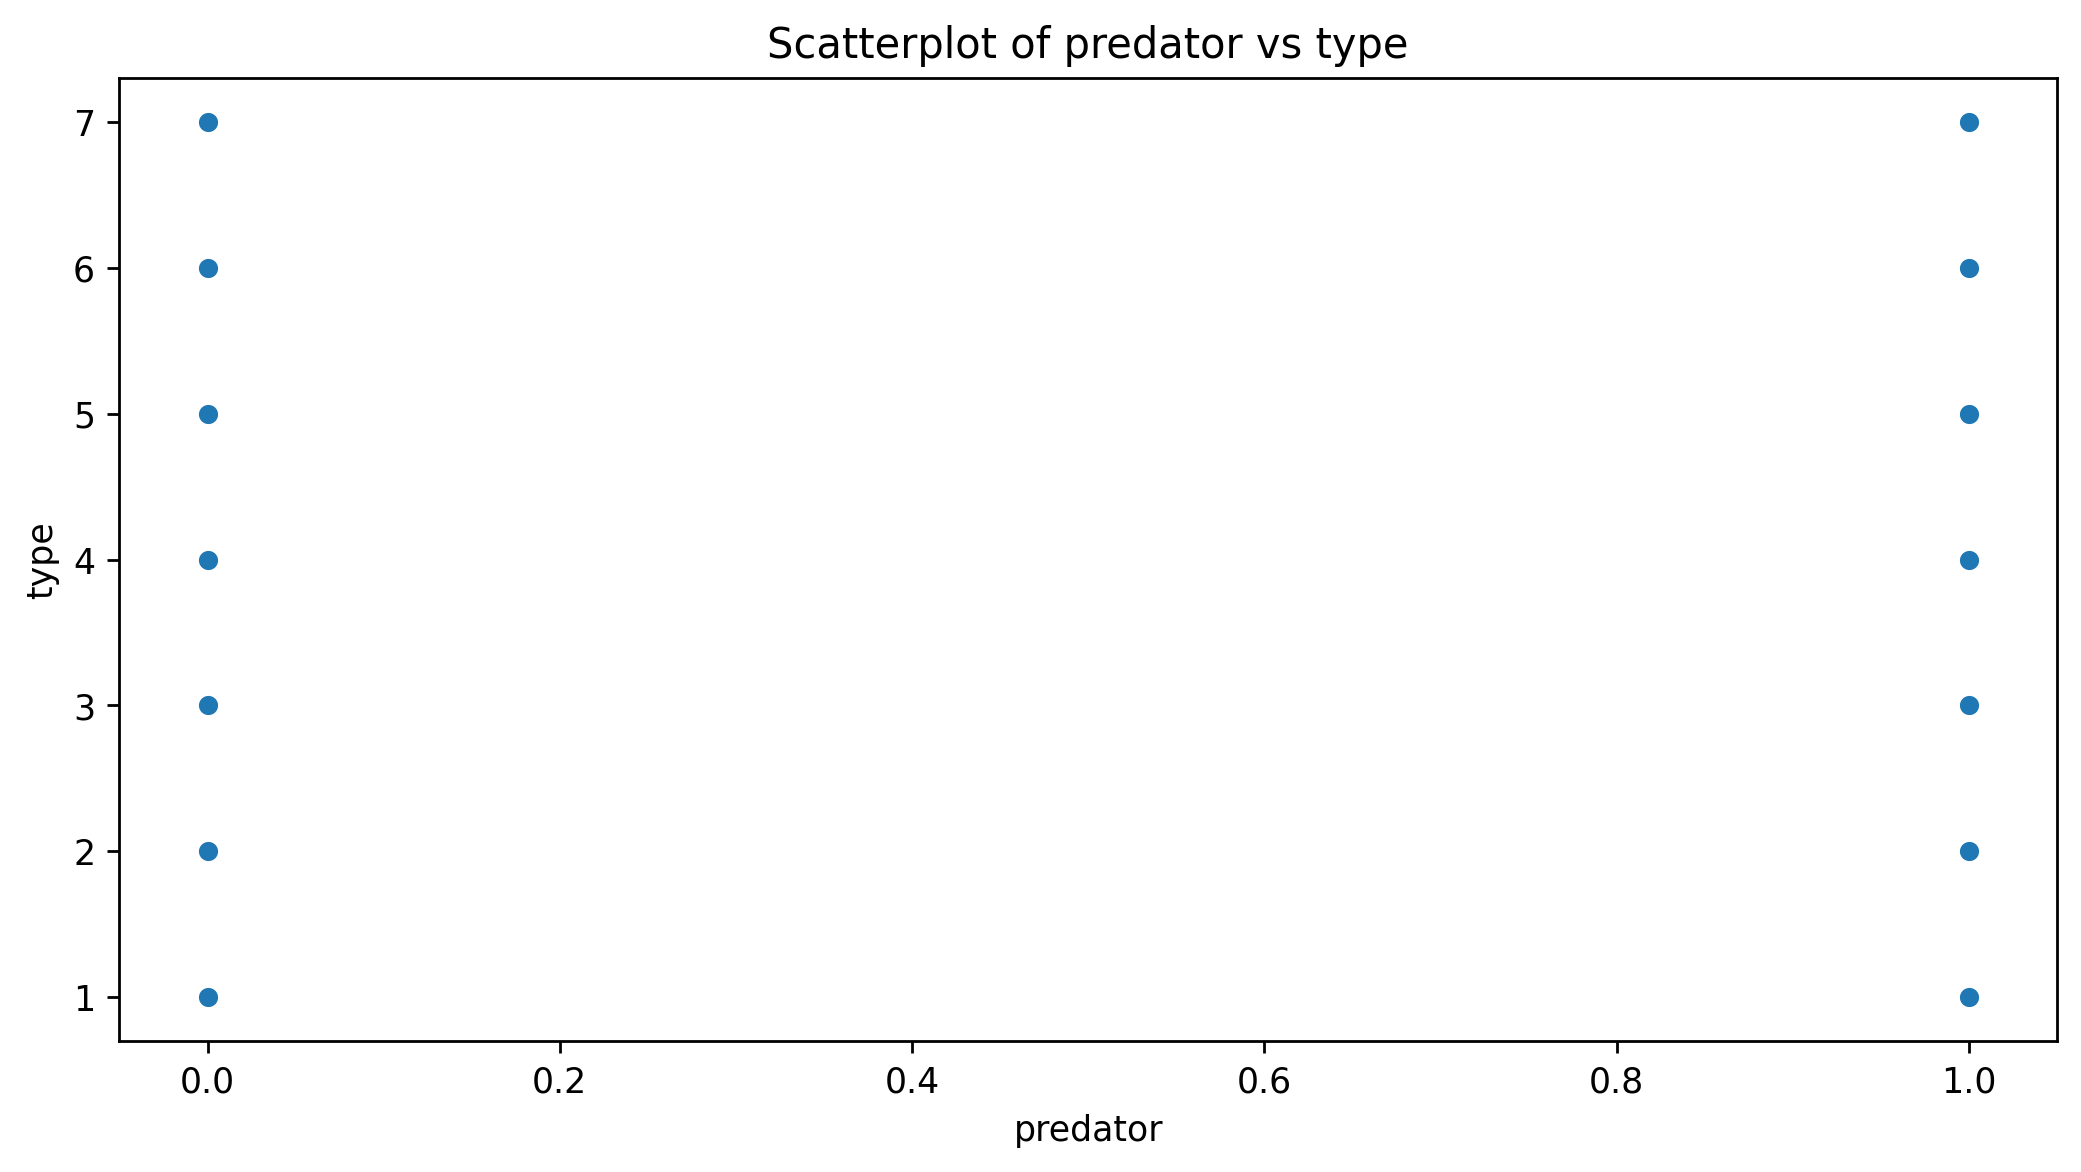

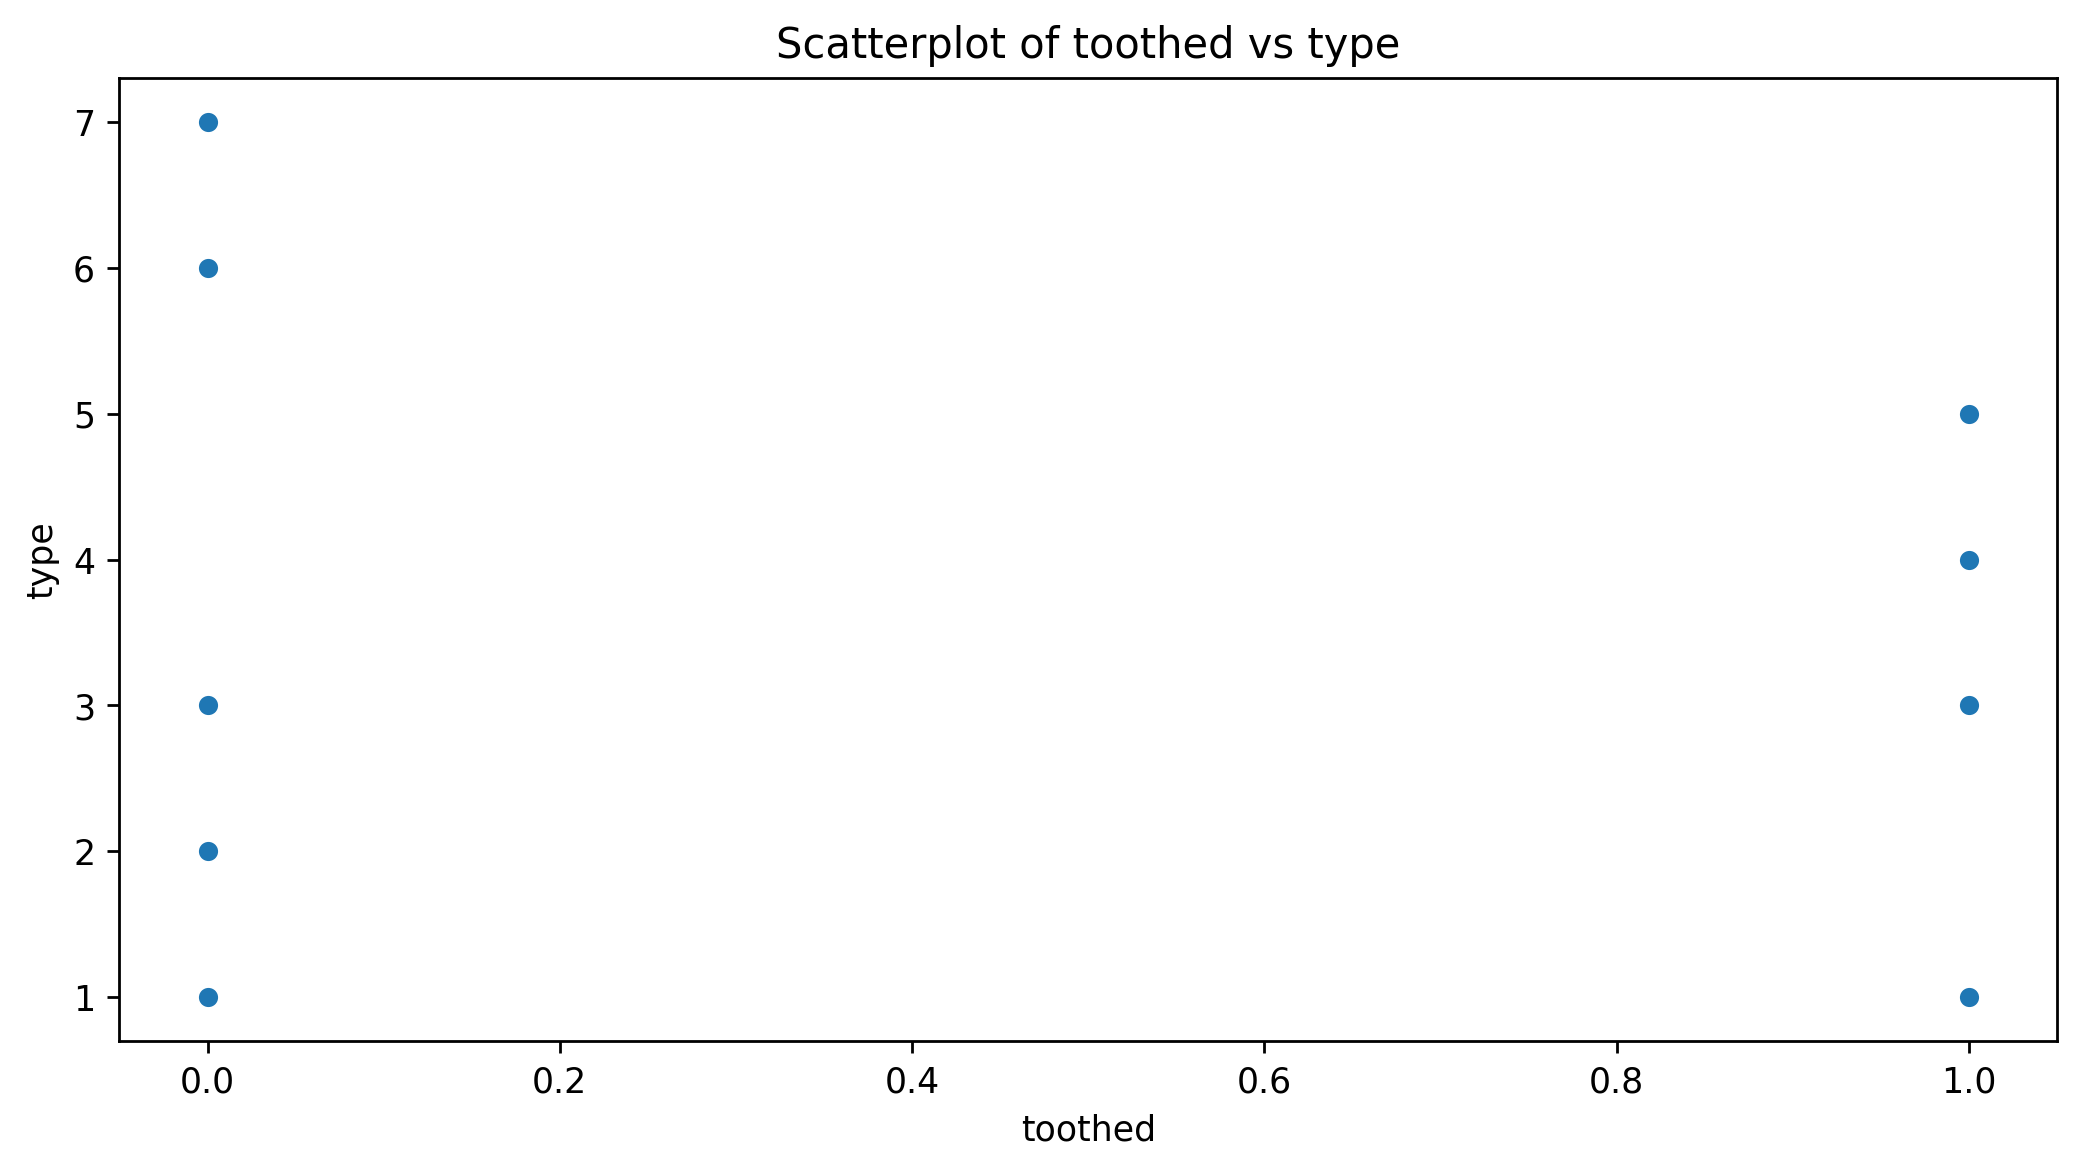

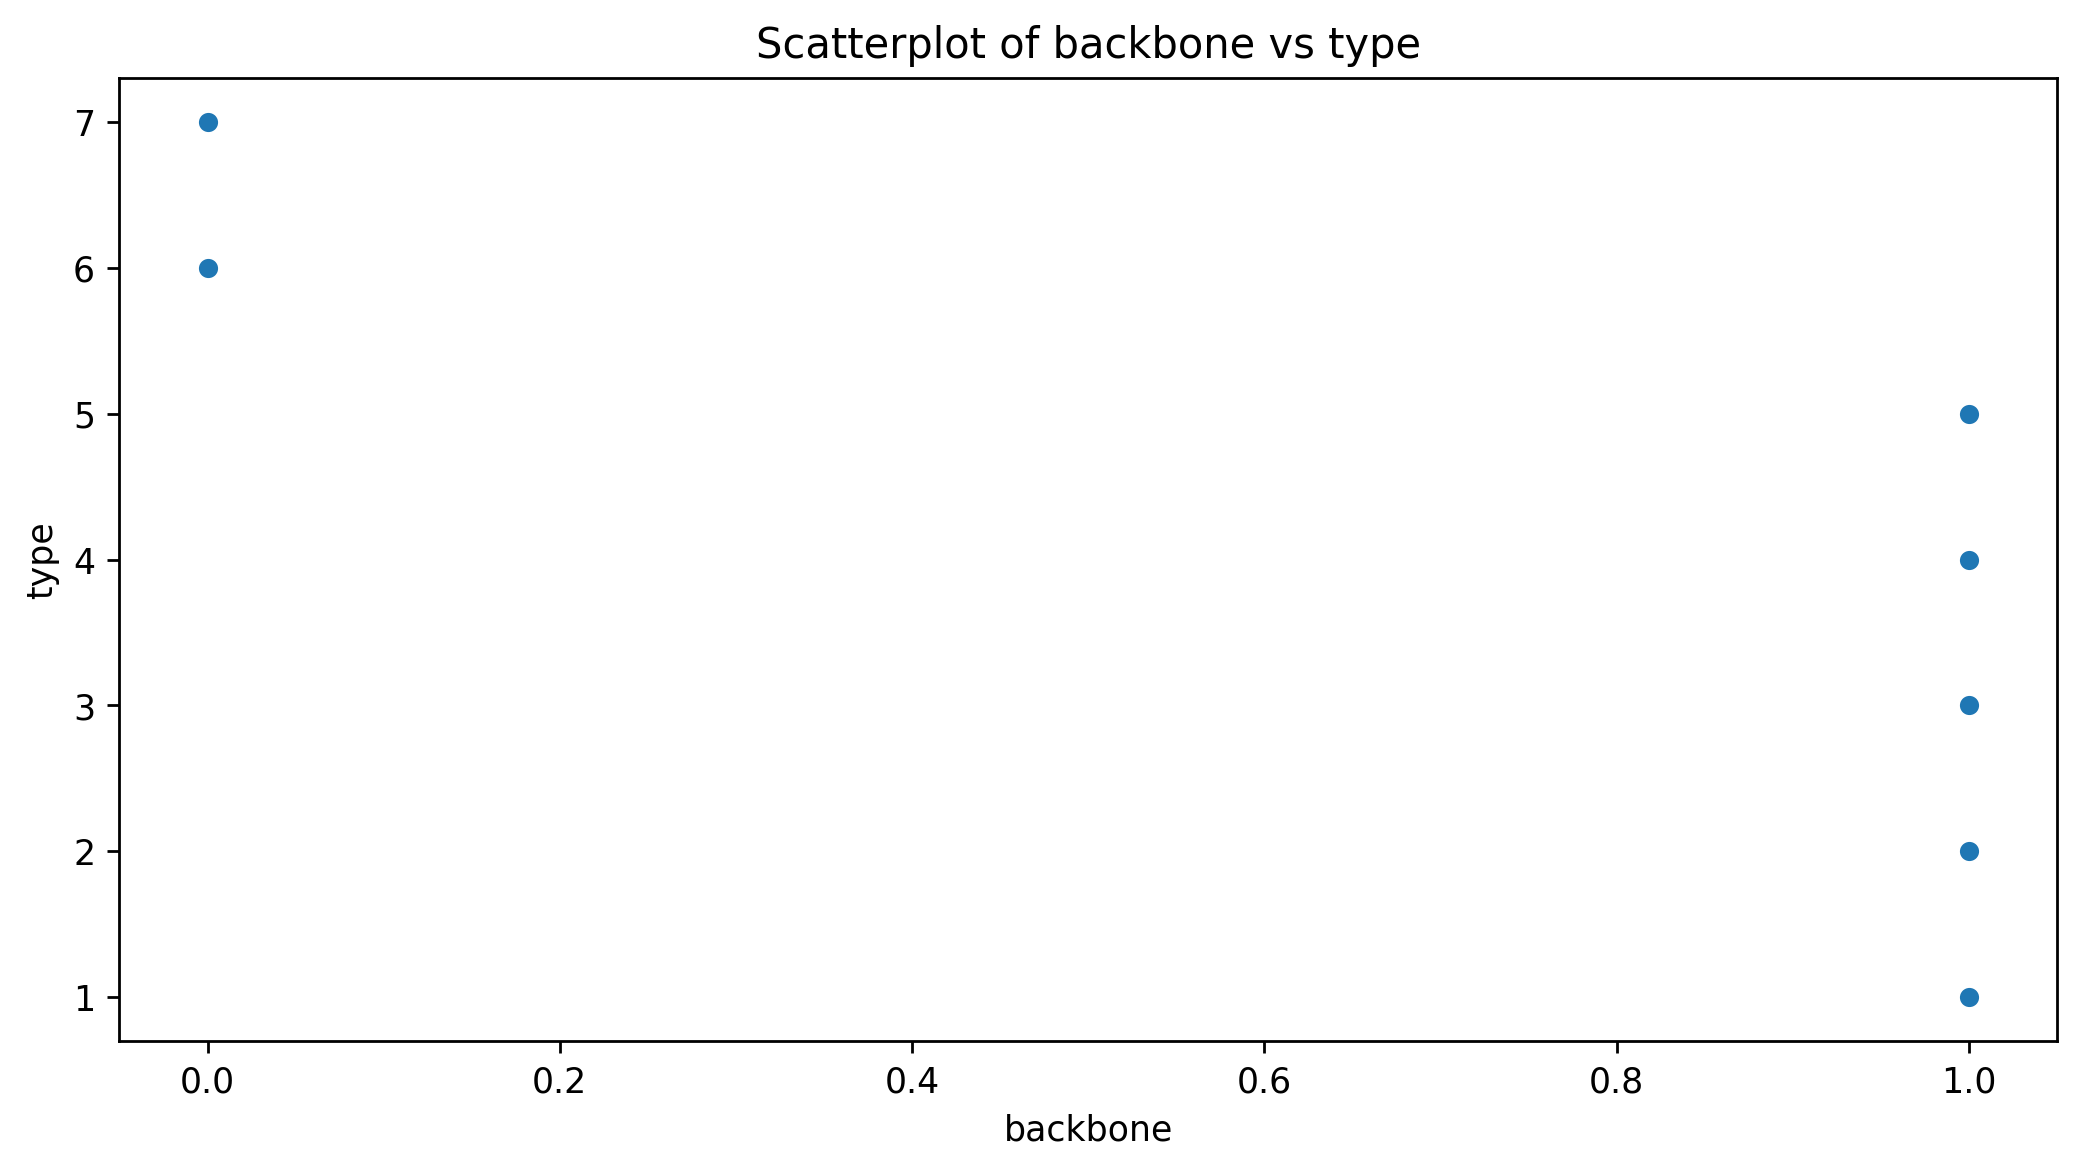

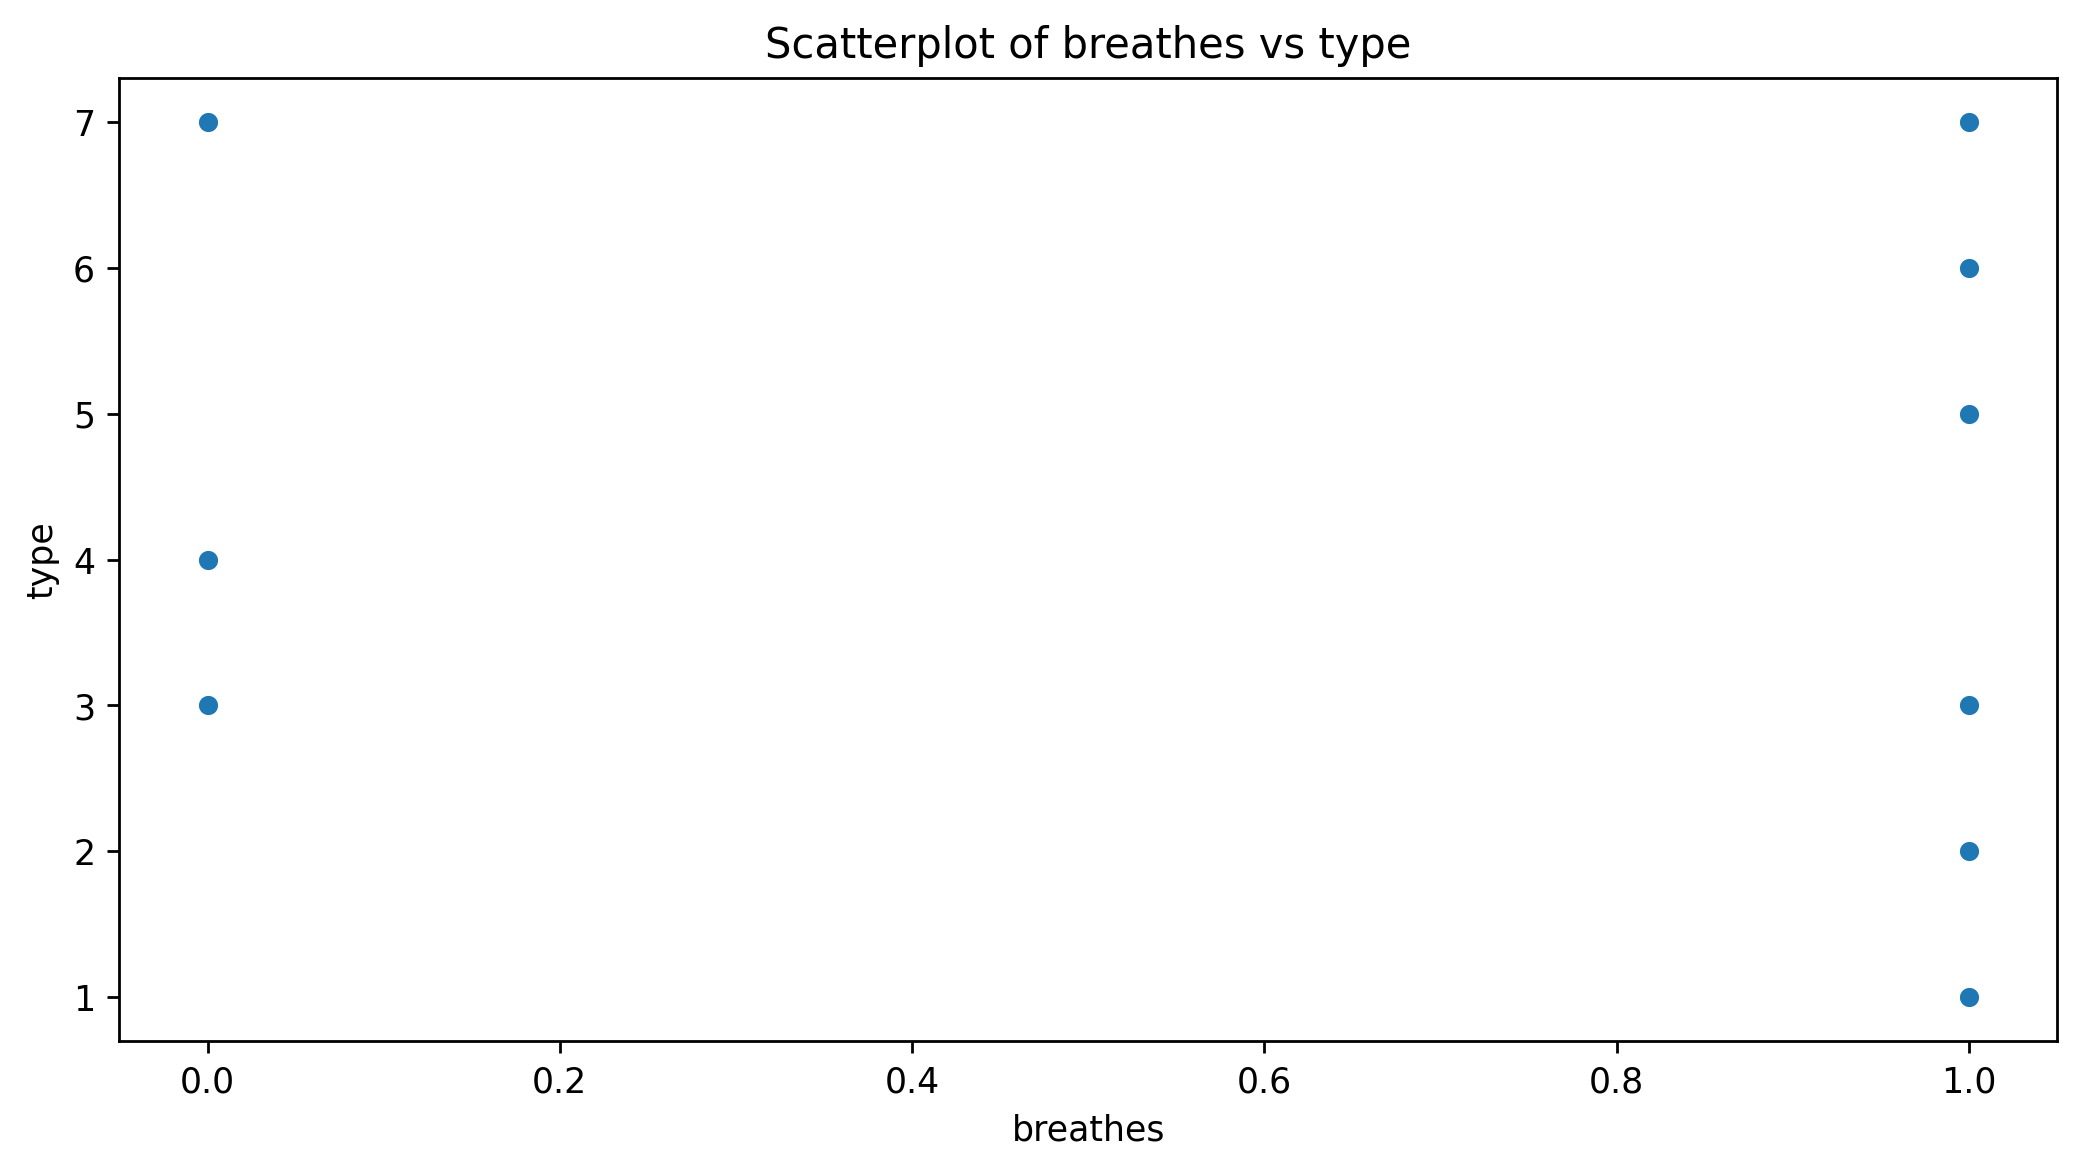

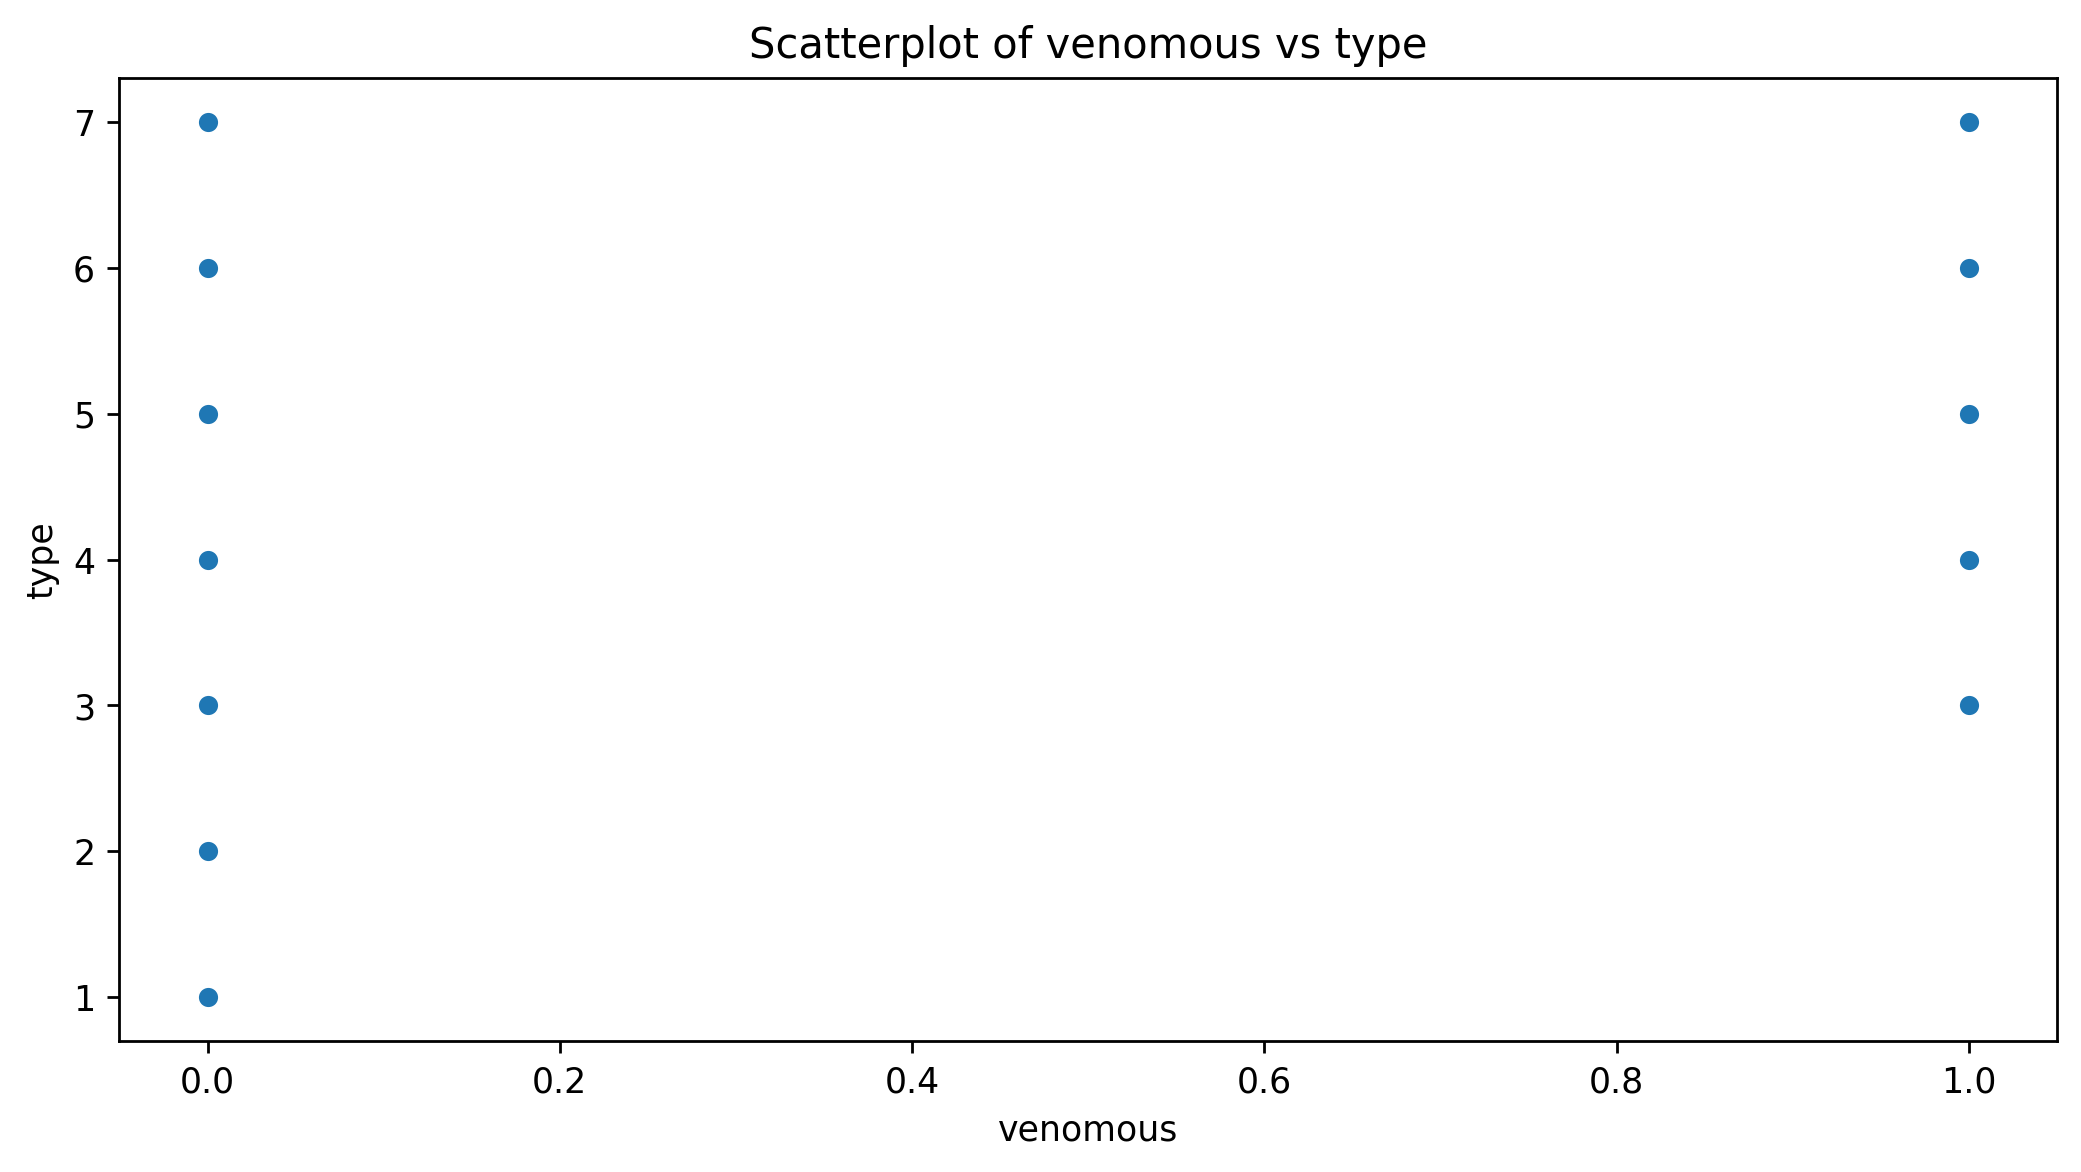

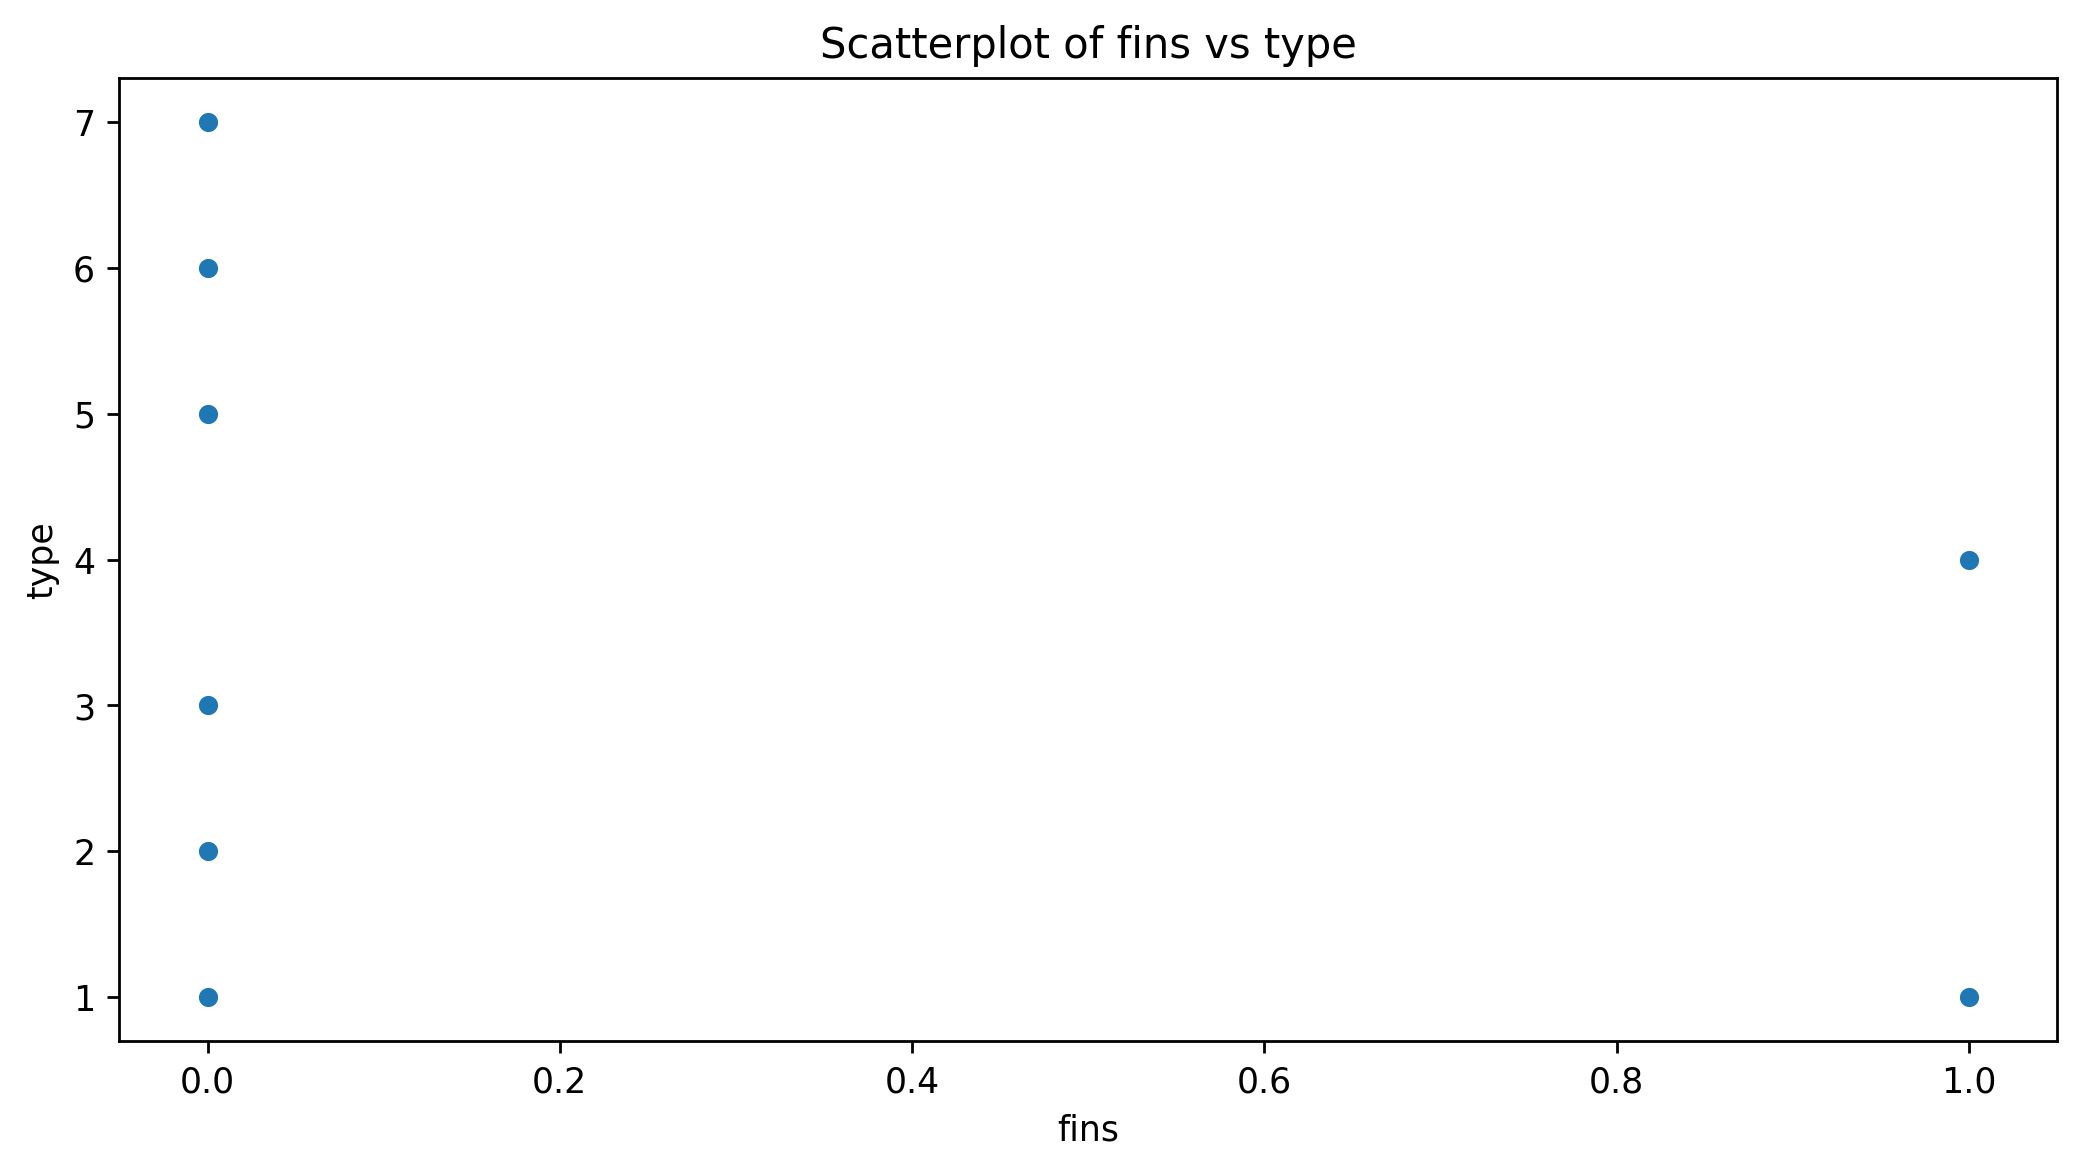

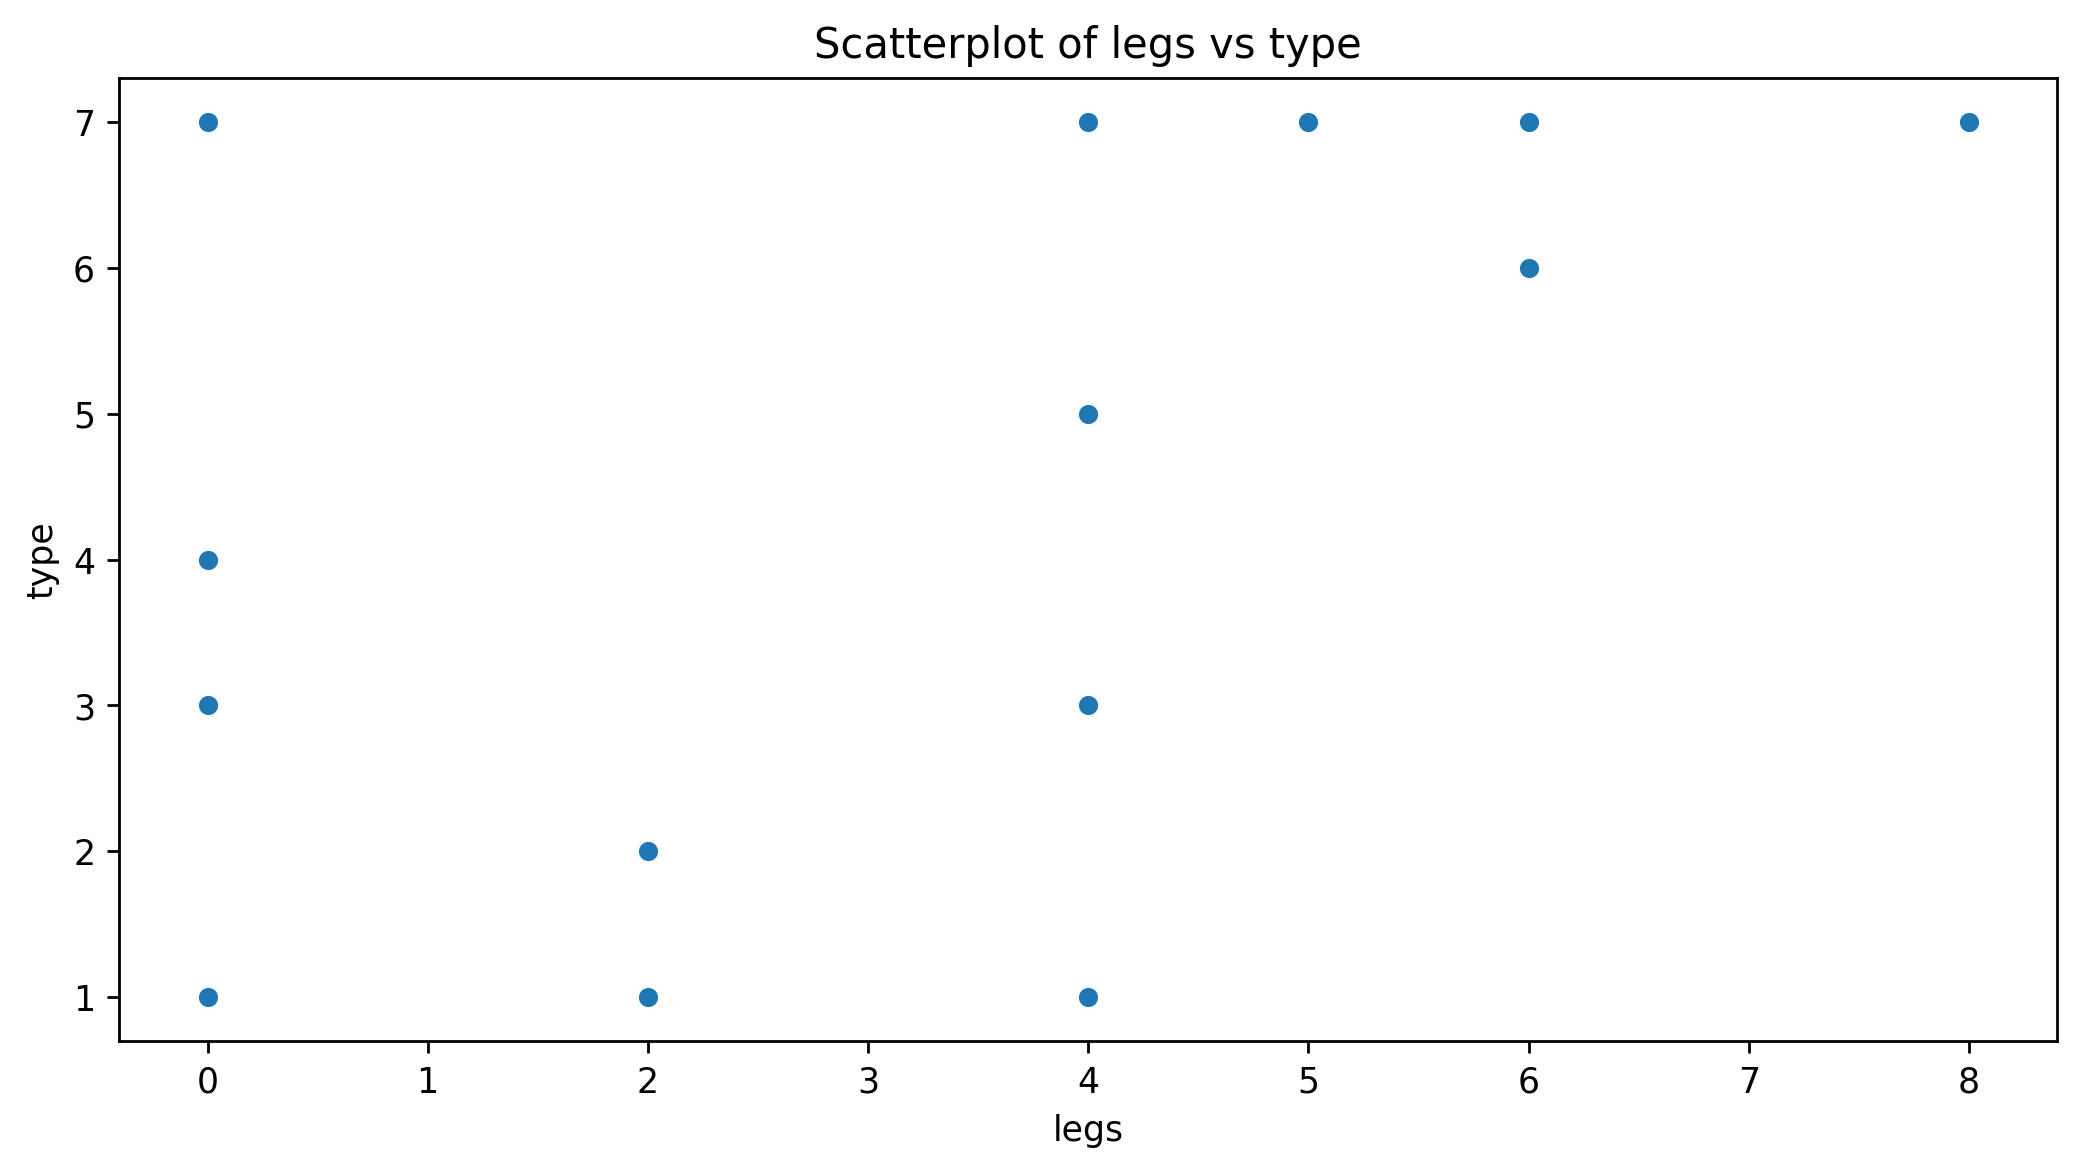

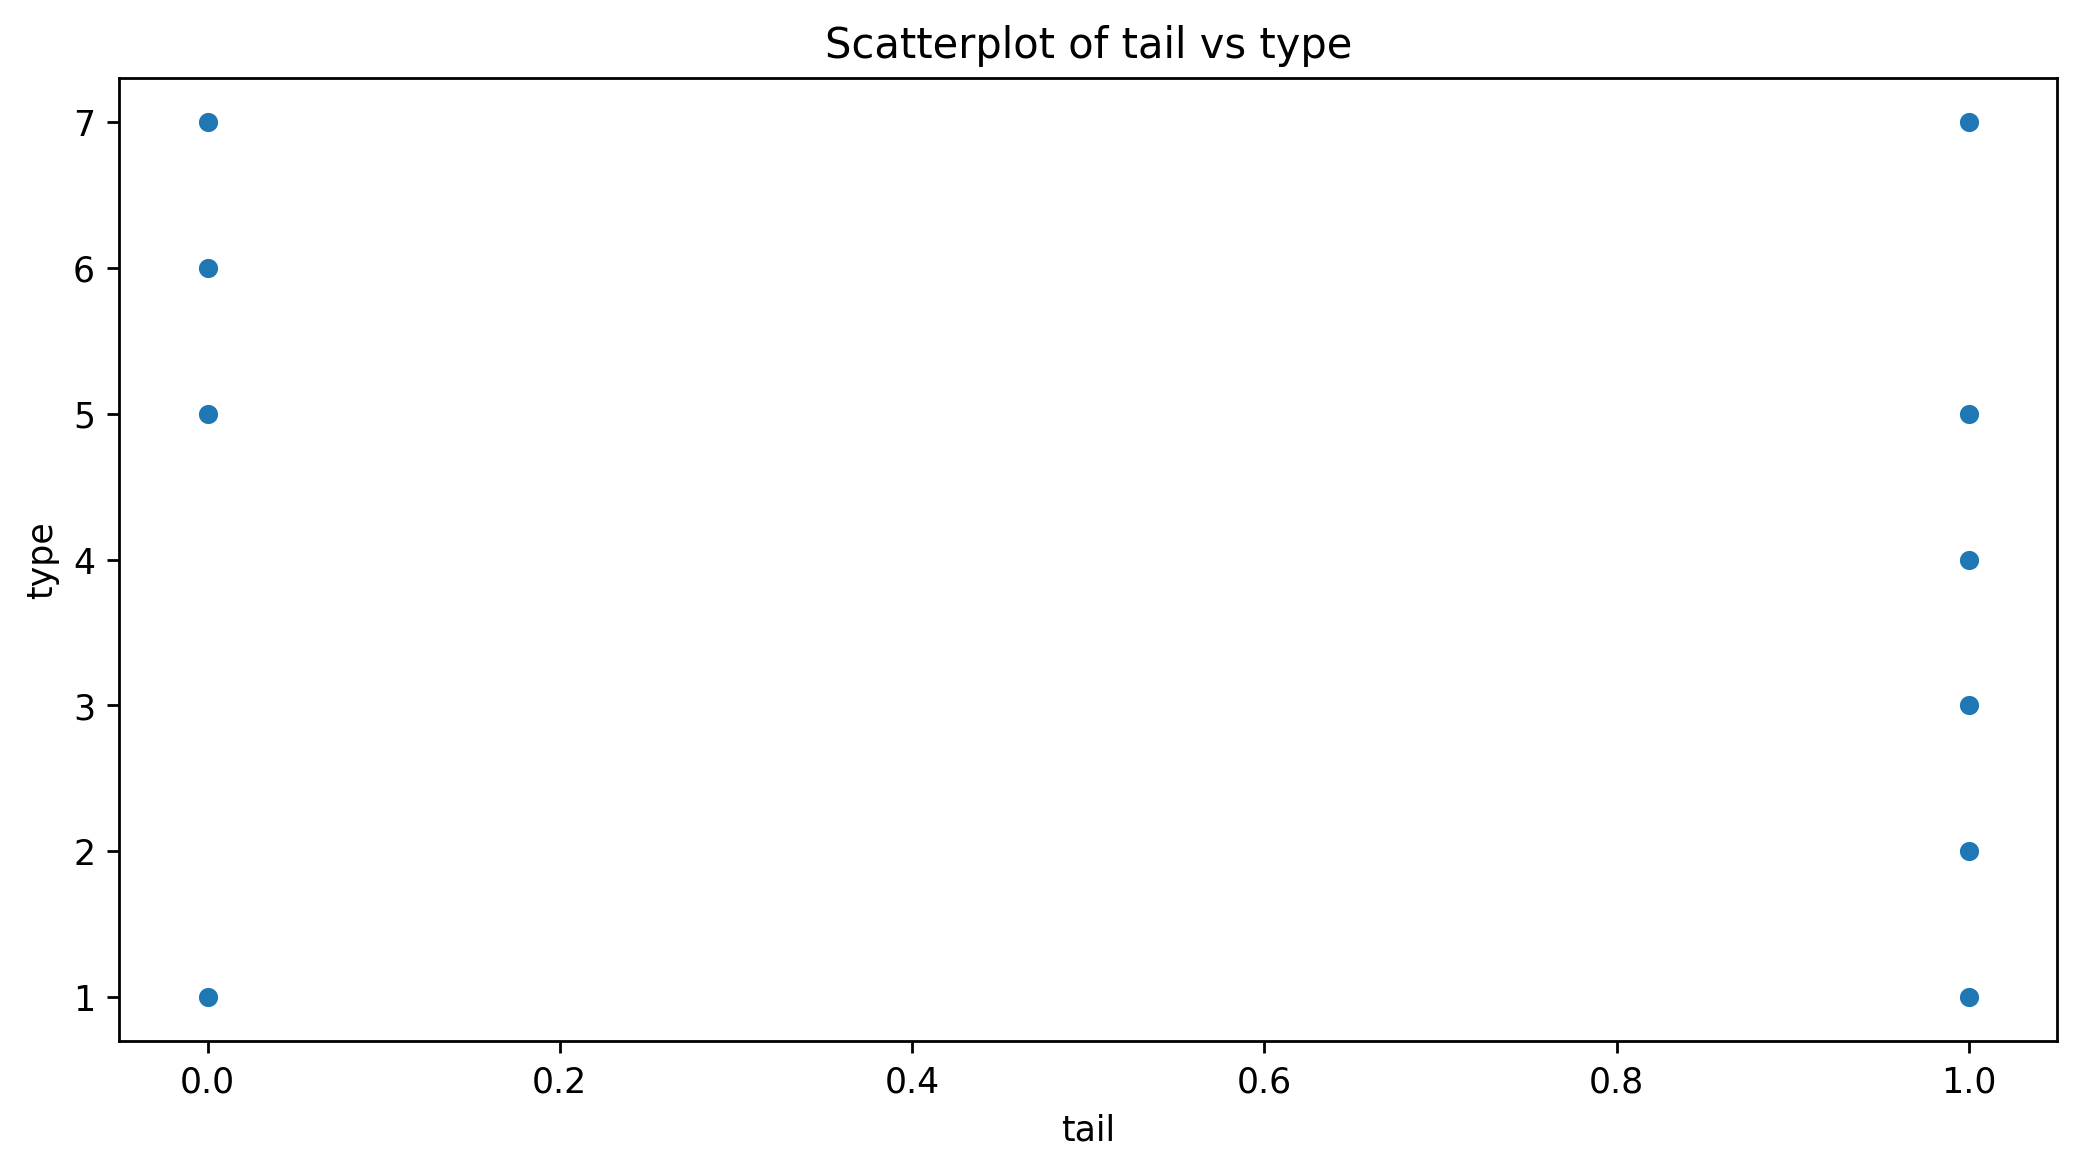

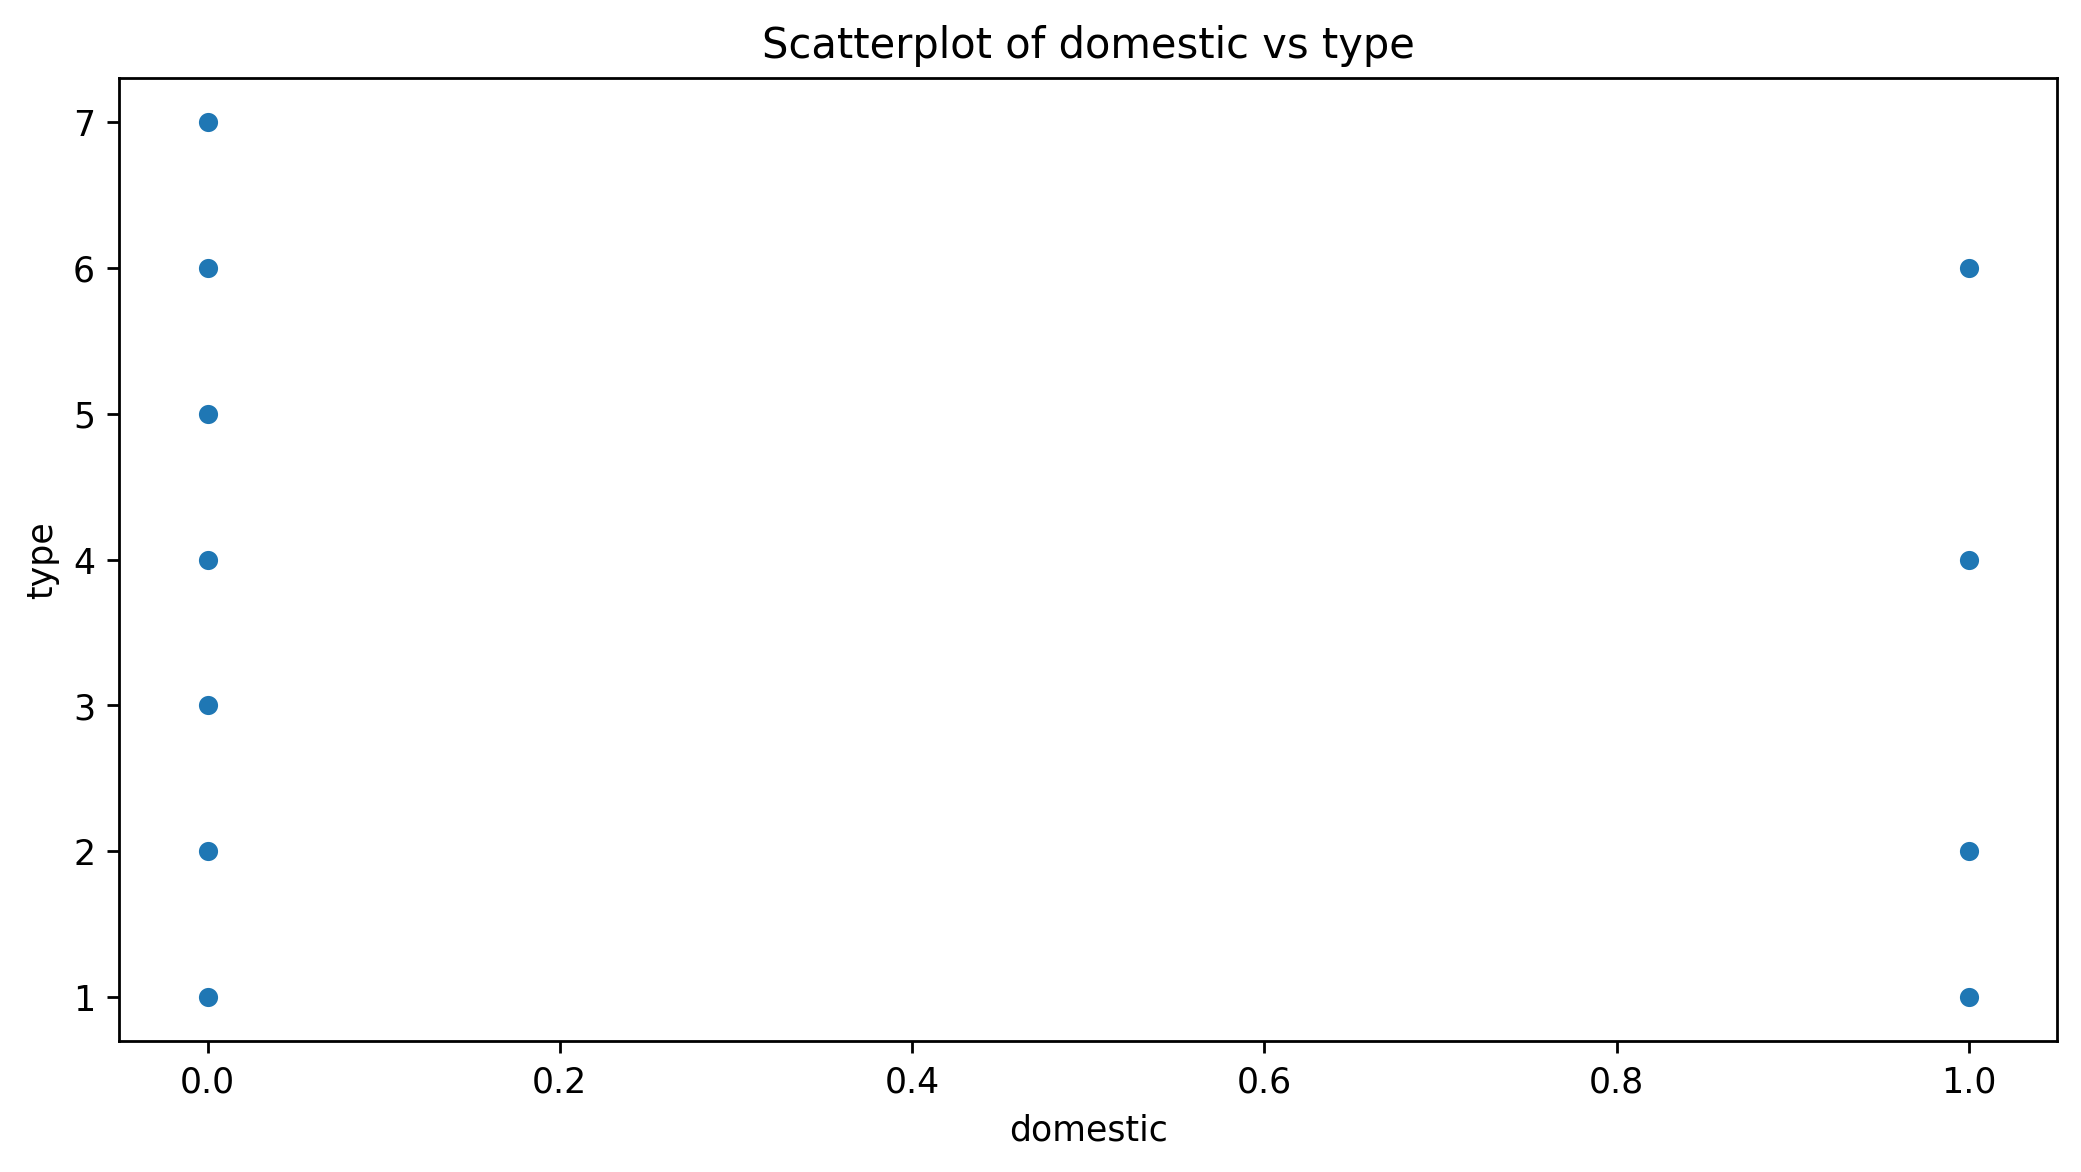

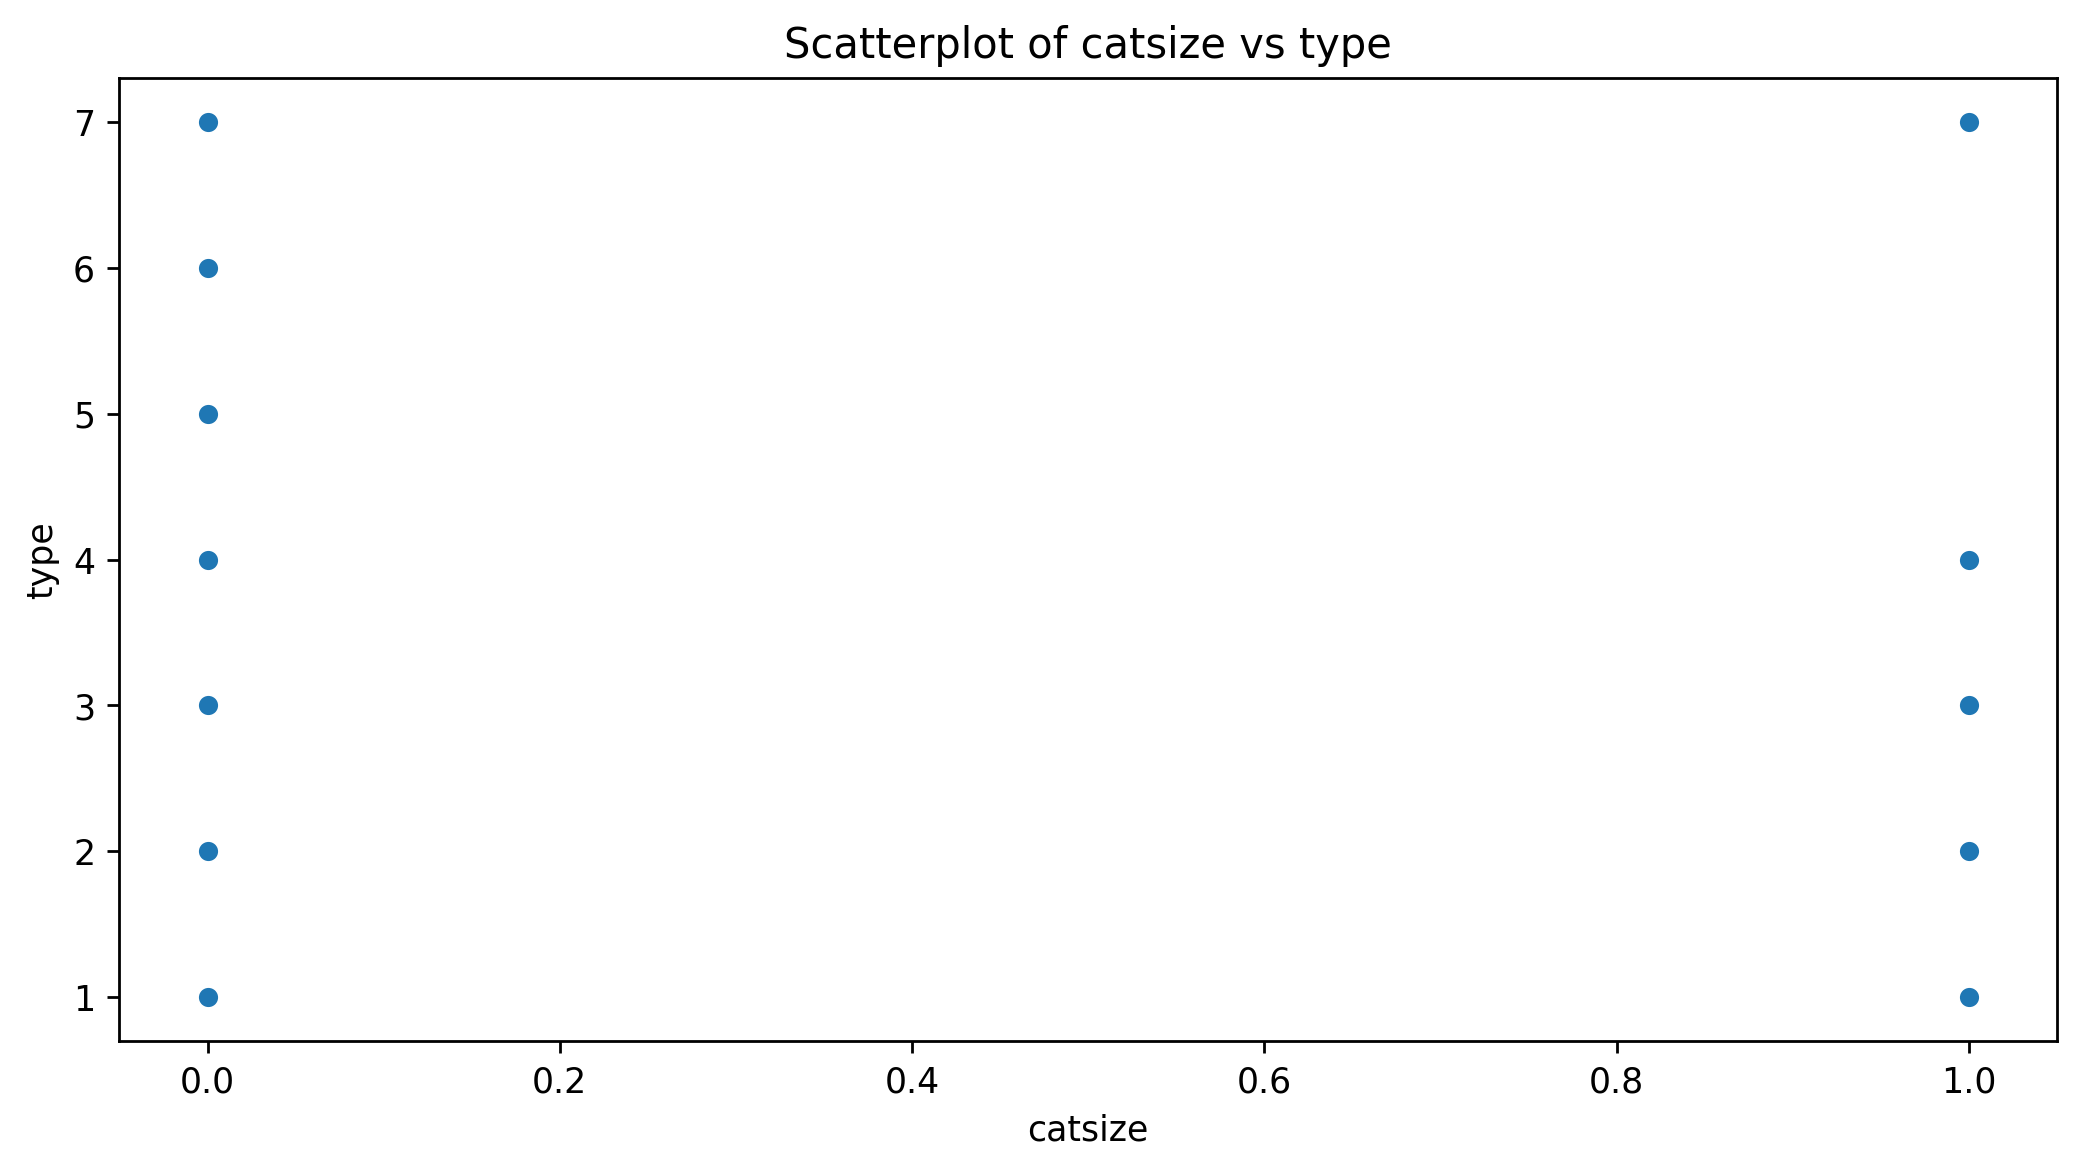

In [ ]:
# Select columns based on certain criteria
selected_columns = df[['hair', 'feathers', 'eggs', 'milk', 'airborne',
                       'aquatic', 'predator', 'toothed', 'backbone', 'breathes',
                       'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']]

# Loop through the selected columns and create scatterplots against the target variable
target_variable = 'type'
for column in selected_columns.columns:
    sns.scatterplot(data=df, x=column, y=target_variable)
    plt.title(f'Scatterplot of {column} vs {target_variable}')
    plt.show()


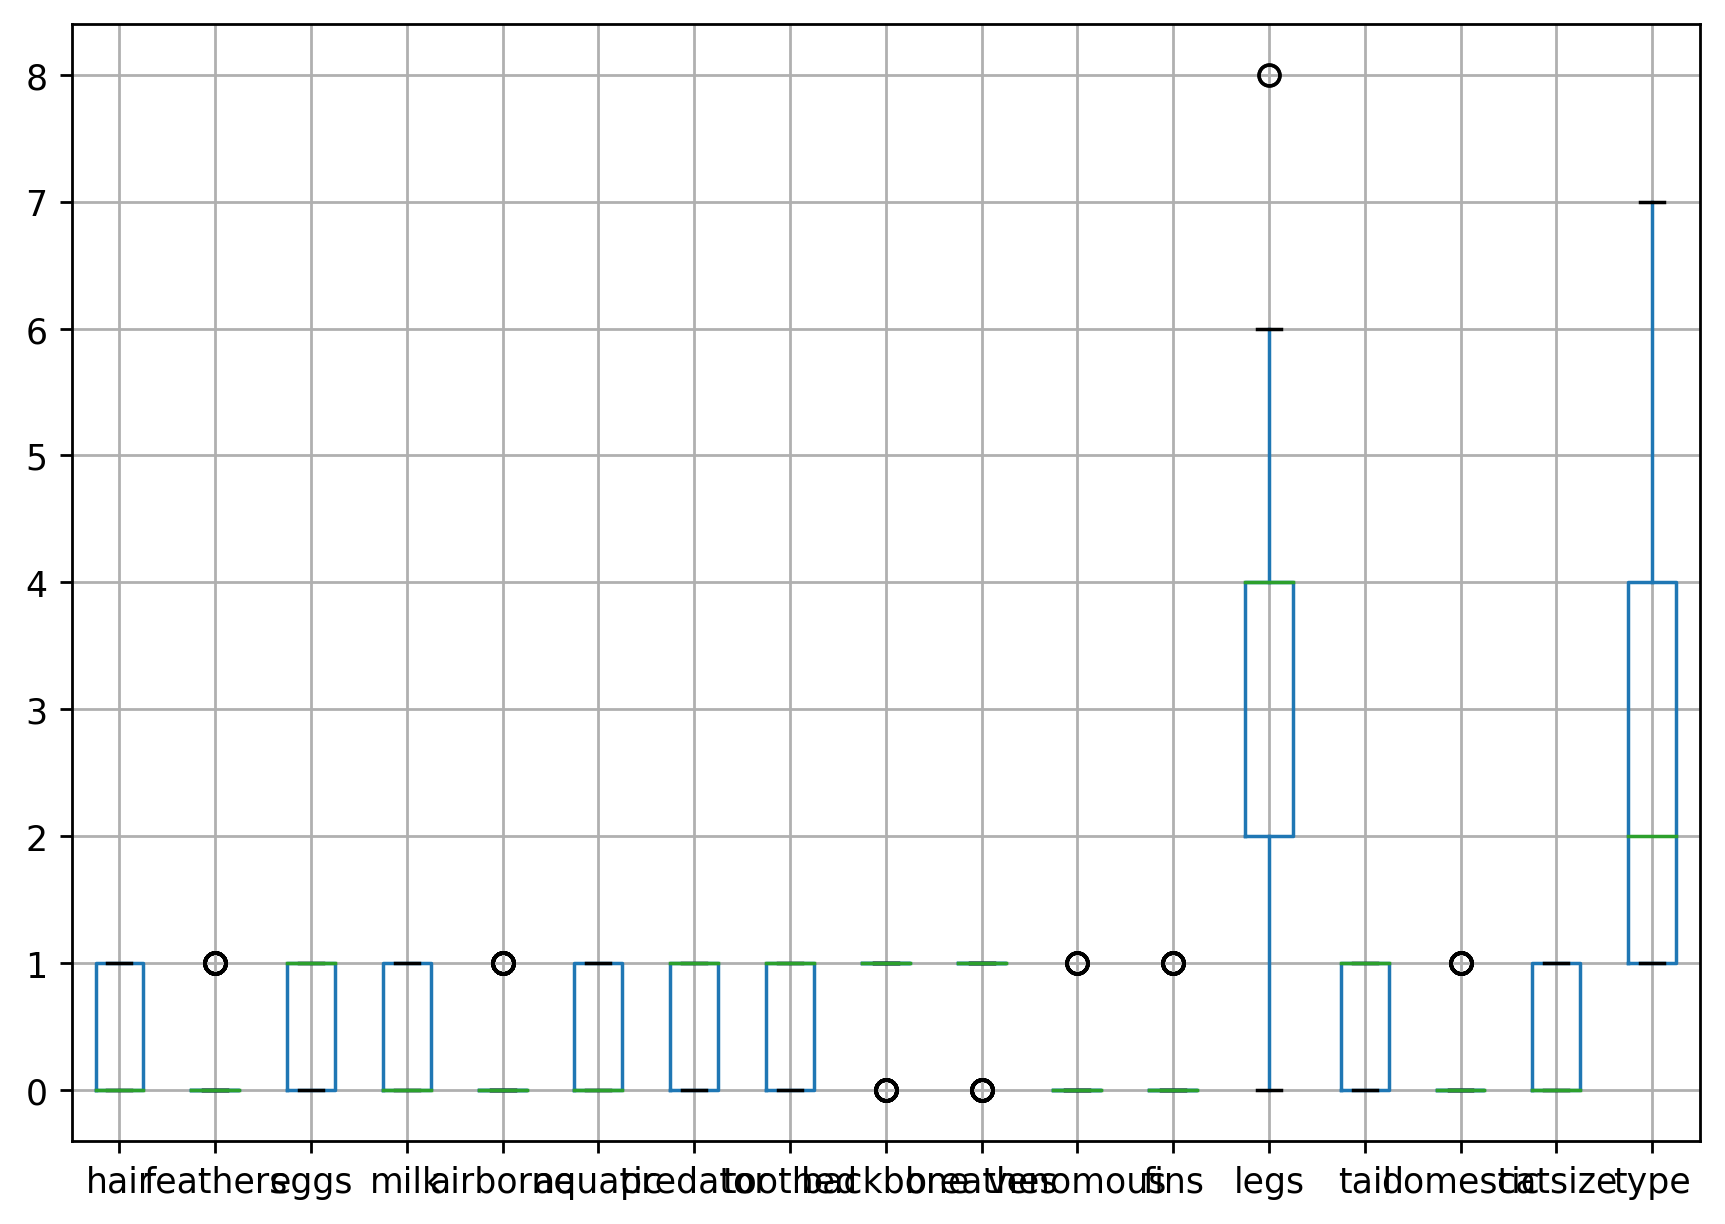

In [13]:
df.boxplot()
plt.tight_layout()

# for delete outliers

In [ ]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [15]:
import numpy as np
def calculate_whisker(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

# Loop through the list and replace outliers
for i in ['feathers', 'milk', 'airborne', 'backbone', 'breathes', 'venomous', 'catsize']:
    lw, uw = calculate_whisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])


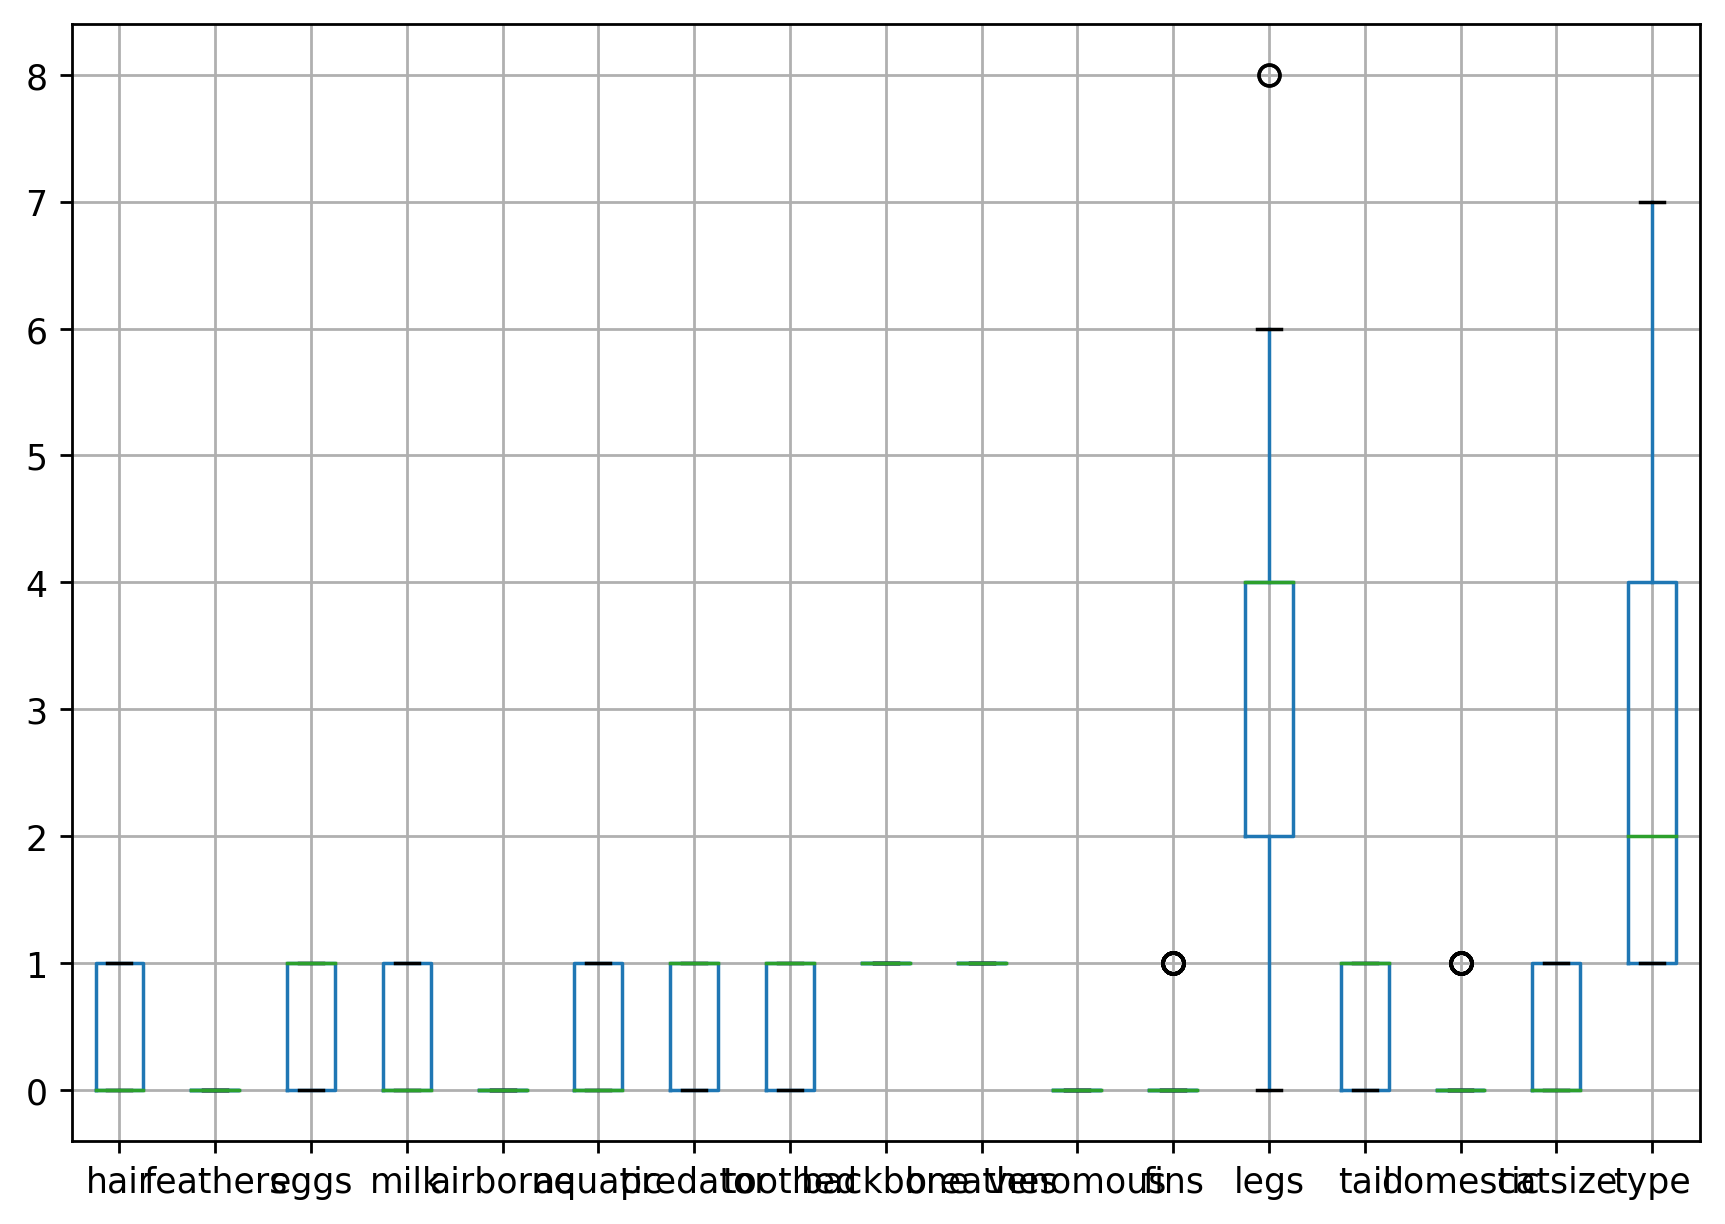

In [16]:
df.boxplot()
plt.tight_layout()

# encodeng -coverting object data in to numeric column

In [17]:
cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['animal name'], dtype='object')

In [18]:
df[cat_cols]

,animal name
0,aardvark
1,antelope
2,bass
3,bear
4,boar
...,...
96,wallaby
97,wasp
98,wolf
99,worm


In [19]:
oe = OrdinalEncoder()

df[cat_cols] = oe.fit_transform(df[cat_cols])

In [20]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0.0,1,0.0,0,1.0,0.0,0,1,1,1.0,1.0,0.0,0,4,0,0,1.0,1
1,1.0,1,0.0,0,1.0,0.0,0,0,1,1.0,1.0,0.0,0,4,1,0,1.0,1
2,2.0,0,0.0,1,0.0,0.0,1,1,1,1.0,1.0,0.0,1,0,1,0,0.0,4
3,3.0,1,0.0,0,1.0,0.0,0,1,1,1.0,1.0,0.0,0,4,0,0,1.0,1
4,4.0,1,0.0,0,1.0,0.0,0,1,1,1.0,1.0,0.0,0,4,1,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95.0,1,0.0,0,1.0,0.0,0,0,1,1.0,1.0,0.0,0,2,1,0,1.0,1
97,96.0,1,0.0,1,0.0,0.0,0,0,0,1.0,1.0,0.0,0,6,0,0,0.0,6
98,97.0,1,0.0,0,1.0,0.0,0,1,1,1.0,1.0,0.0,0,4,1,0,1.0,1
99,98.0,0,0.0,1,0.0,0.0,0,0,0,1.0,1.0,0.0,0,0,0,0,0.0,7


In [21]:
df.dtypes

animal name    float64
hair             int64
feathers       float64
eggs             int64
milk           float64
airborne       float64
aquatic          int64
predator         int64
toothed          int64
backbone       float64
breathes       float64
venomous       float64
fins             int64
legs             int64
tail             int64
domestic         int64
catsize        float64
type             int64
dtype: object

#model building

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [23]:
x = df.iloc[:,:-1]
y = df['type']

In [24]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [26]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.95, 0.9523809523809523)

In [27]:
from sklearn.model_selection import cross_val_score

# Assuming 'knn' is your KNN model
scores = cross_val_score(knn, x, y, cv=5)

print("Cross-validated Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Cross-validated Accuracy: 0.93 (+/- 0.08)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)
ypred_train = knn.predict(xtrain)
ypred_test = knn.predict(xtest)

# Calculate precision, recall, and F1-score for the training set
precision_train = precision_score(ytrain, ypred_train, average='weighted')
recall_train = recall_score(ytrain, ypred_train, average='weighted')
f1_train = f1_score(ytrain, ypred_train, average='weighted')

In [29]:
# Calculate precision, recall, and F1-score for the test set
precision_test = precision_score(ytest, ypred_test, average='weighted')
recall_test = recall_score(ytest, ypred_test, average='weighted')
f1_test = f1_score(ytest, ypred_test, average='weighted')

In [30]:
print("Training Precision:", precision_train)
print("Training Recall:", recall_train)
print("Training F1-score:", f1_train)
print("\nTest Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1-score:", f1_test)


Training Precision: 0.95625
Training Recall: 0.95
Training F1-score: 0.9473776223776225

Test Precision: 0.9603174603174603
Test Recall: 0.9523809523809523
Test F1-score: 0.9466089466089466


In [31]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2

    accuracy                           0.95        21
   macro avg       0.97      0.92      0.93        21
weighted avg       0.96      0.95      0.95        21

